<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2025/blob/main/Module_6/28_Gaussian_Proceses_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian processes

The notebook for the University of Tennessee, Knoxville, Department of Materials Science and Engineering Spring 2025 course, MSE510.
- Instructor Sergei V. Kalinin
- Examples adapted from: https://livebook.manning.com/book/bayesian-optimization-in-action/chapter-1/  
- Several examples are based on ChatGPT

In [ ]:
!pip install -qq gpytorch
!pip install -qq botorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.7/277.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# Ridge regression: learning  from data

What does this code do?

This code performs smooth interpolation using Ridge regression, which is a regularized form of linear regression. First, it creates a dense set of x-values over the interval from 0 to 10 using `np.linspace(0, 10, 500)`. These are the points where we want to predict or interpolate y-values. Then, a Ridge regression model is initialized with `alpha=0.1`. The `alpha` parameter controls how strongly the model penalizes large coefficients. Lower values of `alpha` make it behave more like standard linear regression; higher values produce smoother, more regularized fits.The x-data is reshaped into a 2D array with one column (as required by scikit-learn's input format). This is done using `.reshape(-1, 1)` on both the original x-values (`x_data`) and the interpolation points (`x_interp`). The Ridge model is then trained using `ridge.fit(x_data_reshaped, y_data)`, which fits the regression model to the input data. Finally, predictions are made at the interpolation points using `ridge.predict(x_interp_reshaped)`, resulting in a smoothed y-curve that can be plotted or analyzed further.

📘 What is Ridge Regression?

Ridge regression is a variant of linear regression that adds a regularization term to the loss function. This term penalizes large weights in the regression model, which helps to reduce overfitting and produce smoother predictions, especially in the presence of noise or correlated inputs. In contrast to ordinary least squares, which minimizes the sum of squared errors, Ridge regression minimizes:

Loss = Σ (y_i - y_pred_i)^2 + α Σ β_j^2


The first term measures how well the model fits the training data. The second term penalizes large model coefficients, encouraging simpler models. The `α` parameter balances this trade-off between fit and smoothness. When `α = 0`, Ridge regression reduces to standard linear regression. As `α` increases, the model becomes more biased but less variable, improving generalization. This makes Ridge regression well suited for interpolation tasks where you want stable, smooth results from sparse or noisy data.


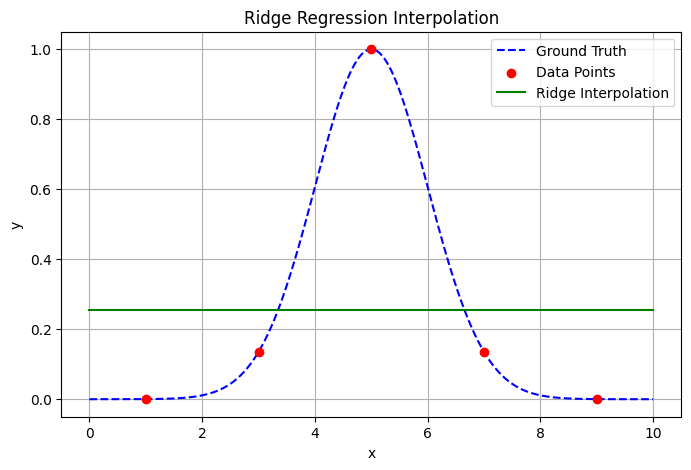

In [ ]:
# Reimport necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Define the ground truth function (1D Gaussian-like "hump")
def ground_truth_function(x):
    return np.exp(-0.5 * (x - 5)**2)

# Generate the 1D data set (5 points sampled from the ground truth function)
x_data = np.array([1, 3, 5, 7, 9])  # Points at which we sample the ground truth function
y_data = ground_truth_function(x_data)

# Create the interpolation points
x_interp = np.linspace(0, 10, 500)  # Fine grid over the same interval

# Use Ridge regression for interpolation
ridge = Ridge(alpha=0.1)  # Regularization strength
x_data_reshaped = x_data.reshape(-1, 1)  # Reshape for sklearn
x_interp_reshaped = x_interp.reshape(-1, 1)

ridge.fit(x_data_reshaped, y_data)  # Fit the model
y_interp = ridge.predict(x_interp_reshaped)  # Predict values for interpolation

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x_interp, ground_truth_function(x_interp), label='Ground Truth', color='blue', linestyle='--')
plt.scatter(x_data, y_data, label='Data Points', color='red', zorder=5)
plt.plot(x_interp, y_interp, label='Ridge Interpolation', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression Interpolation')
plt.legend()
plt.grid(True)
plt.show()


This code performs interpolation using Ridge regression with polynomial features. A polynomial of degree 5 is used to capture non-linear trends in the data, while Ridge regularization (alpha=100) helps prevent overfitting by penalizing large coefficients. The result is a smooth approximation that balances flexibility with stability, even in the presence of noisy data.


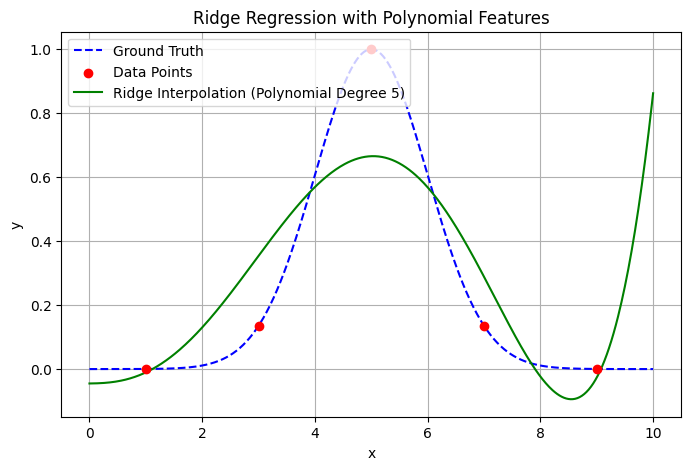

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

# Use polynomial features to capture non-linear relationships
degree = 5  # Degree of the polynomial
poly_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=100))

# Fit the Ridge regression model with polynomial features
poly_ridge.fit(x_data_reshaped, y_data)
y_interp_poly = poly_ridge.predict(x_interp_reshaped)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x_interp, ground_truth_function(x_interp), label='Ground Truth', color='blue', linestyle='--')
plt.scatter(x_data, y_data, label='Data Points', color='red', zorder=5)
plt.plot(x_interp, y_interp_poly, label=f'Ridge Interpolation (Polynomial Degree {degree})', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with Polynomial Features')
plt.legend()
plt.grid(True)
plt.show()

This code demonstrates Kernel Ridge Regression using an RBF (Radial Basis Function) kernel. Unlike standard Ridge regression, which fits a linear (or polynomial) model to the data, Kernel Ridge projects the data into a high-dimensional feature space where non-linear relationships can be modeled as if they were linear.

The RBF kernel allows the model to focus locally on each training point, producing a smooth, flexible curve that fits complex, non-linear patterns. The 'gamma' parameter controls the width of the RBF kernel — smaller values lead to wider influence of each point (smoother curves), while larger values make the model more sensitive to local variations (risk of overfitting).

This is an example of a kernel method where the input space is implicitly transformed,and the model finds structure in the transformed space while preserving generalization through regularization (alpha).


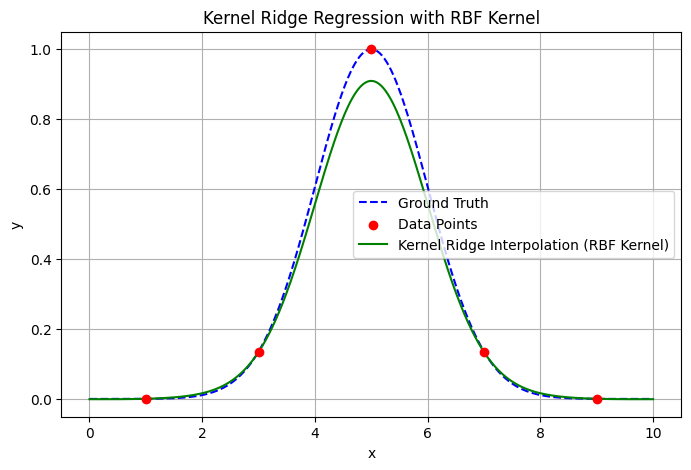

In [ ]:
from sklearn.kernel_ridge import KernelRidge

# Use Kernel Ridge Regression with an RBF (Radial Basis Function) kernel
kernel_ridge = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.5)  # gamma controls the kernel width

# Fit the Kernel Ridge regression model
kernel_ridge.fit(x_data_reshaped, y_data)
y_interp_kernel = kernel_ridge.predict(x_interp_reshaped)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x_interp, ground_truth_function(x_interp), label='Ground Truth', color='blue', linestyle='--')
plt.scatter(x_data, y_data, label='Data Points', color='red', zorder=5)
plt.plot(x_interp, y_interp_kernel, label='Kernel Ridge Interpolation (RBF Kernel)', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kernel Ridge Regression with RBF Kernel')
plt.legend()
plt.grid(True)
plt.show()

What is this code doing?

This code manually computes the solution to **Kernel Ridge Regression (KRR)** using the **Radial Basis Function (RBF) kernel**. Kernel Ridge Regression is a regularized model that combines the concepts of ridge regression and kernel methods. Instead of learning weights for features directly, it uses a kernel function to compute pairwise similarities between training points and solves for a set of dual weights (also called alpha coefficients). These weights are then used to make predictions in a high-dimensional feature space, without explicitly constructing that space.

The first part of the code computes the kernel (Gram) matrix using the RBF kernel:

$$
K_{ij} = \exp(-\gamma \|x_i - x_j\|^2)
$$

The `gamma` parameter controls the width of the RBF kernel, affecting how local or global the influence of each training point is. Next, the code adds a regularization term to the kernel matrix. This is done to avoid overfitting and to ensure that the matrix inversion is numerically stable. The regularized kernel matrix is defined as:

$$
K_{\text{reg}} = K + \alpha I
$$

where $\alpha$ is the regularization strength and $I$ is the identity matrix.

The dual weights (alphas) are computed by solving the linear system:

$$
\boldsymbol{\alpha} = (K + \alpha I)^{-1} \mathbf{y}
$$

These alpha coefficients represent the contribution of each training data point in the final prediction. For a new input $x$, the predicted output is given by:

$$
\hat{y}(x) = \sum_{i=1}^n \alpha_i \cdot k(x, x_i)
$$

Finally, the code displays the kernel matrix and the computed weights using pandas DataFrames for better readability. This provides insight into how strongly each training point contributes to the model and how similar the training points are to each other under the chosen kernel.


In [ ]:
# Compute the kernel matrix and weights (w) for the given Kernel Ridge Regression model

# Step 1: Extract the kernel matrix (Gram matrix)
# The kernel matrix is computed based on the RBF kernel formula
from sklearn.metrics.pairwise import rbf_kernel

# Compute the RBF kernel matrix using the training data
kernel_matrix = rbf_kernel(x_data_reshaped, x_data_reshaped, gamma=0.5)

# Step 2: Compute weights (w)
# Kernel Ridge Regression solution: alpha = (K + alpha*I)^-1 * y
alpha_param = 0.1  # Regularization parameter
n_samples = len(x_data)  # Number of data points

# Add regularization term (alpha * identity matrix)
regularized_kernel = kernel_matrix + alpha_param * np.eye(n_samples)

# Compute weights (alpha coefficients)
weights = np.linalg.solve(regularized_kernel, y_data)

# Output kernel matrix and weights
import pandas as pd
kernel_matrix_df = pd.DataFrame(kernel_matrix, columns=x_data, index=x_data)
weights_df = pd.DataFrame(weights, index=x_data, columns=["Weights"])

print(kernel_matrix)

print(weights)

[[1.00000000e+00 1.35335283e-01 3.35462628e-04 1.52299797e-08
  1.26641655e-14]
 [1.35335283e-01 1.00000000e+00 1.35335283e-01 3.35462628e-04
  1.52299797e-08]
 [3.35462628e-04 1.35335283e-01 1.00000000e+00 1.35335283e-01
  3.35462628e-04]
 [1.52299797e-08 3.35462628e-04 1.35335283e-01 1.00000000e+00
  1.35335283e-01]
 [1.26641655e-14 1.52299797e-08 3.35462628e-04 1.35335283e-01
  1.00000000e+00]]
[-0.00141201  0.01170926  0.90621054  0.01170926 -0.00141201]


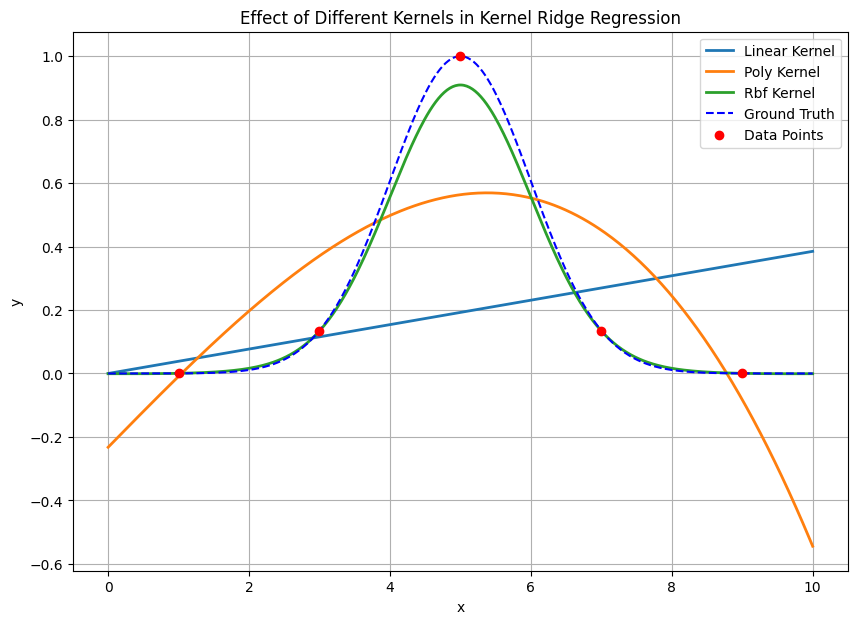

In [ ]:
# Demonstrating the effect of different kernels in Kernel Ridge Regression

from sklearn.kernel_ridge import KernelRidge

# Define the kernels to compare
kernels = ['linear', 'poly', 'rbf']  # Linear, Polynomial, and RBF kernels
gamma = 0.5  # Gamma for RBF and Polynomial kernels
degree = 3   # Degree for Polynomial kernel
alpha = 0.1  # Regularization parameter

# Create a plot to compare the results
plt.figure(figsize=(10, 7))

for i, kernel in enumerate(kernels):
    # Initialize the Kernel Ridge Regression model with the given kernel
    if kernel == 'poly':
        model = KernelRidge(kernel=kernel, alpha=alpha, gamma=gamma, degree=degree)
    else:
        model = KernelRidge(kernel=kernel, alpha=alpha, gamma=gamma)

    # Fit the model and predict
    model.fit(x_data_reshaped, y_data)
    y_interp_kernel = model.predict(x_interp_reshaped)

    # Plot the results
    plt.plot(x_interp, y_interp_kernel, label=f'{kernel.capitalize()} Kernel', lw=2)

# Plot the ground truth and data points
plt.plot(x_interp, ground_truth_function(x_interp), label='Ground Truth', color='blue', linestyle='--')
plt.scatter(x_data, y_data, label='Data Points', color='red', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of Different Kernels in Kernel Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()


🔍 Comparing Kernel Ridge Regression (KRR) and Kernel Density Estimation (KDE)

Kernel Ridge Regression (KRR) and Kernel Density Estimation (KDE) both rely on kernel functions to model structure in data, but they are fundamentally different in purpose and behavior. KRR is a **supervised learning** method that learns a function mapping input values \( x \) to target values \( y \) by solving a regularized least squares problem in a high-dimensional feature space defined by the kernel. It computes weights (dual coefficients) to fit the targets \( y \), and can model complex, nonlinear relationships while avoiding overfitting through regularization. In contrast, KDE is an **unsupervised method** that estimates the **probability density** of a dataset. It smooths each data point into a small "bump" using the kernel, and sums these to form a continuous estimate of the underlying distribution \( p(x) \). There is no target variable \( y \) in KDE, and no optimization—just a direct application of the kernel function. While both methods use kernels (often Gaussian/RBF), KRR learns from labeled data and produces a predictive function \( \hat{y}(x) \), whereas KDE works only with unlabeled samples and estimates how densely populated different regions of the input space are.


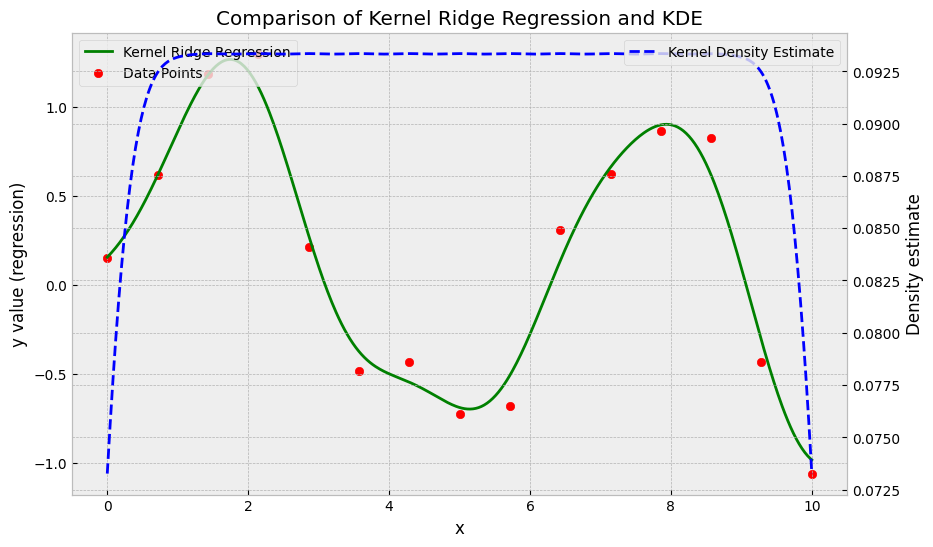

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KernelDensity

# Generate synthetic 1D data
np.random.seed(42)
x_data = np.linspace(0, 10, 15)
y_data = np.sin(x_data) + 0.3 * np.random.randn(len(x_data))

# Reshape for sklearn
x_data_reshaped = x_data.reshape(-1, 1)

# Interpolation points
x_interp = np.linspace(0, 10, 500).reshape(-1, 1)

# Kernel Ridge Regression (RBF kernel)
krr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.5)
krr.fit(x_data_reshaped, y_data)
y_krr = krr.predict(x_interp)

# Kernel Density Estimation (fit only on x_data)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5)
kde.fit(x_data_reshaped)
log_dens = kde.score_samples(x_interp)
density = np.exp(log_dens)

# Plot both
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot KRR (regression)
ax1.plot(x_interp, y_krr, label='Kernel Ridge Regression', color='green')
ax1.scatter(x_data, y_data, color='red', label='Data Points')
ax1.set_ylabel('y value (regression)')
ax1.set_xlabel('x')
ax1.legend(loc='upper left')
ax1.grid(True)

# Plot KDE (density)
ax2 = ax1.twinx()
ax2.plot(x_interp, density, label='Kernel Density Estimate', color='blue', linestyle='--')
ax2.set_ylabel('Density estimate')
ax2.legend(loc='upper right')

plt.title('Comparison of Kernel Ridge Regression and KDE')
plt.show()


🔍 Kernel Ridge Regression: Hyperparameter Optimization and Visualization

In this example, we explored how **Kernel Ridge Regression (KRR)** performance depends on the choice of hyperparameters — specifically:

- `alpha`: the regularization strength (controls smoothness and prevents overfitting)
- `gamma`: the width of the RBF kernel (controls how local or global the influence of each point is)

We defined a grid of 10 values for both `alpha` and `gamma`, logarithmically spaced to capture a wide range of behaviors. For each parameter combination, we performed **5-fold cross-validation** and computed the **mean squared error (MSE)**.

✅ What we did:
1. **Generated noisy 1D sinusoidal data** to simulate a regression task.
2. **Evaluated model performance** across all `alpha`/`gamma` pairs using cross-validation.
3. **Identified the best and worst parameter combinations** based on validation error.
4. **Trained two models** — one with optimal parameters, one with poor parameters — and visualized their predictions.
5. **Split the data** into training and validation sets (from one CV fold) and visualized which points were used for training vs validation.
6. **Created a heatmap** of MSE values across the parameter grid to visualize the loss surface.

📊 What the plots show:
- The **left plot** compares the predictions from the best and worst models. The best-fit curve (green) accurately captures the underlying trend, while the worst-fit (orange) severely under- or over-fits. Validation points (blue Xs) are held out from training.
- The **right heatmap** shows the **cross-validated MSE** across the entire hyperparameter grid. Darker colors represent lower error. This helps visualize where good-performing models live in the parameter space.

This example highlights the importance of tuning hyperparameters in kernel-based models. Good choices can result in accurate, smooth models, while poor choices can drastically degrade performance.


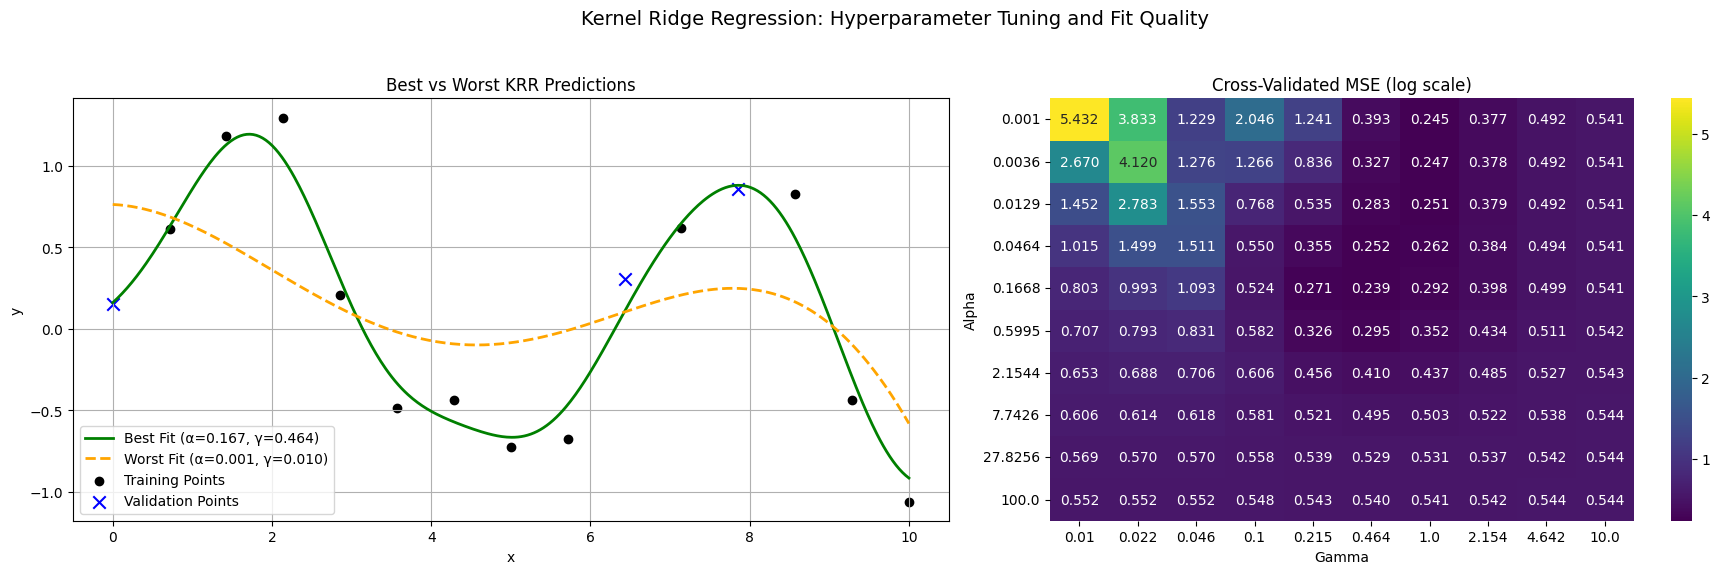

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold

# Generate synthetic 1D data
np.random.seed(42)
x_data = np.linspace(0, 10, 15)
y_data = np.sin(x_data) + 0.3 * np.random.randn(len(x_data))

x_data_reshaped = x_data.reshape(-1, 1)
x_interp = np.linspace(0, 10, 500).reshape(-1, 1)

# Define finer grid for alpha and gamma
alphas = np.logspace(-3, 2, 10)
gammas = np.logspace(-2, 1, 10)
results = np.zeros((len(alphas), len(gammas)))

# Evaluate cross-validation score for each parameter combination
for i, alpha in enumerate(alphas):
    for j, gamma in enumerate(gammas):
        model = KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma)
        scores = cross_val_score(model, x_data_reshaped, y_data, cv=5, scoring='neg_mean_squared_error')
        results[i, j] = -np.mean(scores)

# Find best and worst combinations
best_idx = np.unravel_index(np.argmin(results), results.shape)
worst_idx = np.unravel_index(np.argmax(results), results.shape)
best_alpha, best_gamma = alphas[best_idx[0]], gammas[best_idx[1]]
worst_alpha, worst_gamma = alphas[worst_idx[0]], gammas[worst_idx[1]]

# Train best and worst models
best_model = KernelRidge(kernel='rbf', alpha=best_alpha, gamma=best_gamma)
worst_model = KernelRidge(kernel='rbf', alpha=worst_alpha, gamma=worst_gamma)
best_model.fit(x_data_reshaped, y_data)
worst_model.fit(x_data_reshaped, y_data)
y_best = best_model.predict(x_interp)
y_worst = worst_model.predict(x_interp)

# Train/validation split (for illustration only)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_idx, val_idx = next(kf.split(x_data_reshaped))
x_train, y_train = x_data_reshaped[train_idx], y_data[train_idx]
x_val, y_val = x_data_reshaped[val_idx], y_data[val_idx]

# Plot combined visualization
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1.2, 1]})

# Plot best and worst fits
axs[0].plot(x_interp, y_best, label=f'Best Fit (α={best_alpha:.3f}, γ={best_gamma:.3f})', color='green', linewidth=2)
axs[0].plot(x_interp, y_worst, label=f'Worst Fit (α={worst_alpha:.3f}, γ={worst_gamma:.3f})', color='orange', linestyle='--', linewidth=2)
axs[0].scatter(x_train, y_train, label='Training Points', color='black', marker='o')
axs[0].scatter(x_val, y_val, label='Validation Points', color='blue', marker='x', s=80)
axs[0].set_title('Best vs Worst KRR Predictions')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

# Plot heatmap of validation MSE
sns.heatmap(results, xticklabels=np.round(gammas, 3), yticklabels=np.round(alphas, 4),
            cmap='viridis', annot=True, fmt=".3f", ax=axs[1])
axs[1].set_xlabel('Gamma')
axs[1].set_ylabel('Alpha')
axs[1].set_title('Cross-Validated MSE (log scale)')

plt.suptitle('Kernel Ridge Regression: Hyperparameter Tuning and Fit Quality', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Conditioning distributions

Visualizing a Multivariate Gaussian Distribution: Means, Variances, and Conditioning

This code illustrates the structure of a **3-dimensional multivariate Gaussian distribution**, defined by a mean vector and a full covariance matrix. Specifically, we consider three random variables \( A \), \( B \), and \( C \), each following a joint Gaussian distribution:

$$
\begin{bmatrix}
A \\
B \\
C
\end{bmatrix}
\sim \mathcal{N}(\boldsymbol{\mu}, \Sigma)
$$

where:

- \( \boldsymbol{\mu} = [1, 4, 3] \) is the mean vector for \( A, B, C \),
- \( \Sigma \) is the \( 3 \times 3 \) covariance matrix containing the variances and covariances:
  $$
  \Sigma =
  \begin{bmatrix}
  1.5^2 & 0.99 & 0.1 \\
  0.99 & 0.2^2 & 0.1 \\
  0.1 & 0.1 & 1^2
  \end{bmatrix}
  $$

We then sample 1000 points from this distribution using `np.random.multivariate_normal`.

The **visualization** consists of:
- The **means** of the three variables, shown as purple dots.
- The **standard deviations** (square roots of the diagonal of the covariance matrix), represented as vertical error bars around the means.




<ipython-input-9-91b1659e76f0>:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(means, cov_matrix, num_samples)


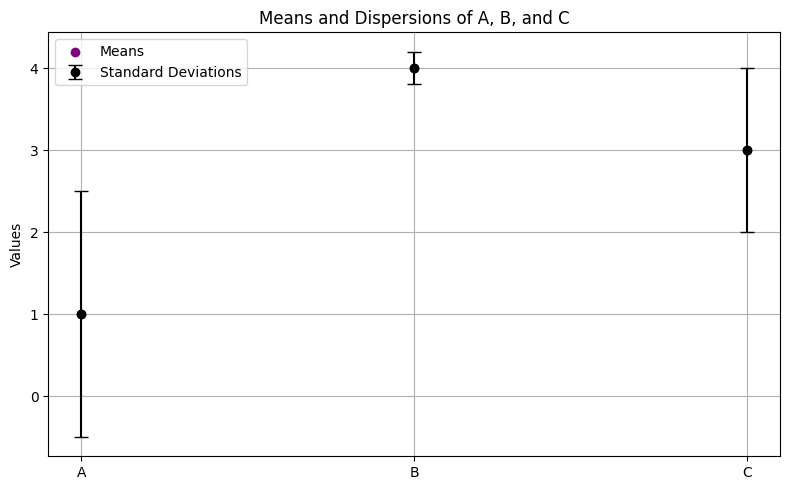

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian distributions
means = np.array([1, 4, 3])  # Means of A, B, C
cov_matrix = np.array([
    [1.5**2, 0.99, 0.1],  # Variance and covariance for A, B, C
    [0.99, 0.2**2, 0.1],
    [0.1, 0.1, 1**2]
])  # Covariance matrix

# Extract standard deviations (sqrt of diagonal elements of covariance matrix)
std_devs = np.sqrt(np.diag(cov_matrix))

# Generate samples from the multivariate Gaussian distribution
num_samples = 1000
data = np.random.multivariate_normal(means, cov_matrix, num_samples)
A, B, C = data[:, 0], data[:, 1], data[:, 2]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot A, B, C as points on X-axis
x_positions = np.arange(1, 4)  # Positions for A, B, C
ax.scatter(x_positions, means, color="purple", label="Means")
ax.errorbar(x_positions, means, yerr=std_devs, fmt="o", color="black", capsize=5, label="Standard Deviations")

# Set x-ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels(["A", "B", "C"])
ax.set_title("Means and Dispersions of A, B, and C")
ax.set_ylabel("Values")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


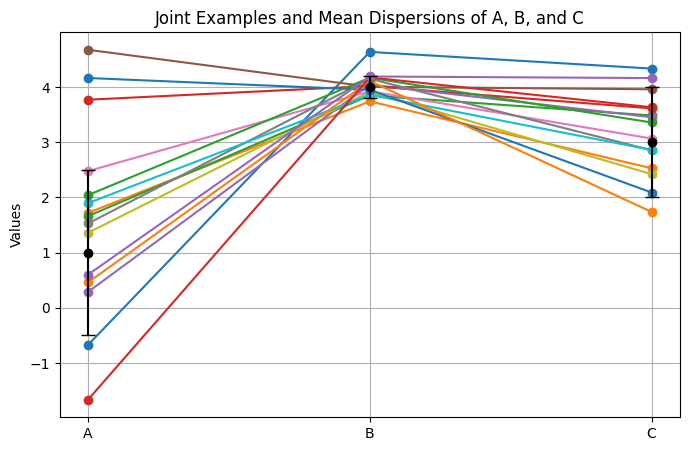

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian distributions
means = np.array([1, 4, 3])  # Means of A, B, C
cov_matrix = np.array([
    [1.5**2, 0, 0.1],  # Variance and covariance for A, B, C
    [0, 0.2**2, 0.1],
    [0.1, 0.1, 1**2]
])  # Covariance matrix

# Extract standard deviations (sqrt of diagonal elements of covariance matrix)
std_devs = np.sqrt(np.diag(cov_matrix))

# Generate samples from the multivariate Gaussian distribution
num_samples = 1000
data = np.random.multivariate_normal(means, cov_matrix, num_samples)
A, B, C = data[:, 0], data[:, 1], data[:, 2]

# Generate a few joint samples from the distribution for visualization
num_samples_to_plot = 15  # Number of joint samples to illustrate
joint_samples = data[:num_samples_to_plot, :]  # Select the first few samples

# Plot the joint examples of values drawn from the distribution
plt.figure(figsize=(8, 5))

# Plot each joint sample as a connected line
for i, sample in enumerate(joint_samples):
    plt.plot(["A", "B", "C"], sample, marker="o", label=f"Sample {i+1}")

# Plot means with error bars derived from the covariance matrix
plt.errorbar(["A", "B", "C"], means, yerr=std_devs, fmt="o", color="black", capsize=5, label="Means with Dispersion")

# Add labels, legend, and grid
plt.title("Joint Examples and Mean Dispersions of A, B, and C")
plt.ylabel("Values")
plt.grid(True)
# Uncomment to show the legend if desired
# plt.legend()
plt.show()



📘 What about conditioning?

In multivariate Gaussian distributions, we can **condition** on one variable to get the distribution of the others. For example, the **conditional distribution** of \( A \) given \( B = b \) (where \( A \) and \( B \) are jointly Gaussian) is also Gaussian, and its parameters are:

**Conditional mean of \( A \) given \( B = b \):**

$$
\mathbb{E}[A \mid B = b] = \mu_A + \Sigma_{AB} \Sigma_{BB}^{-1} (b - \mu_B)
$$

**Conditional variance of \( A \) given \( B \):**

$$
\text{Var}[A \mid B] = \Sigma_{AA} - \Sigma_{AB} \Sigma_{BB}^{-1} \Sigma_{BA}
$$

Where:

- \( \mu_A, \mu_B \) are the means of \( A \) and \( B \),
- \( \Sigma_{AA}, \Sigma_{BB} \) are their variances,
- \( \Sigma_{AB} \) is the covariance between \( A \) and \( B \).

The same rules apply for conditioning on any subset of variables — this is very useful in **Bayesian inference**, **Kalman filters**, and **Gaussian processes**.


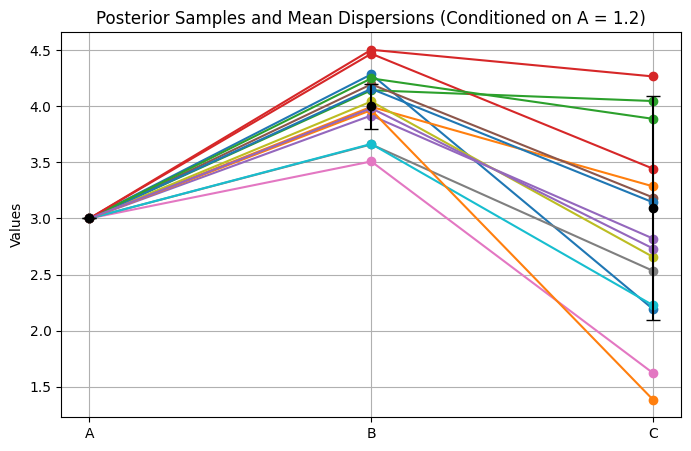

In [ ]:
from scipy.stats import multivariate_normal

# Conditioning the distribution on A = 1.2
A_conditioned = 3

# Extract the covariance matrix components
Sigma = cov_matrix
Sigma_aa = Sigma[0, 0]
Sigma_ab = Sigma[0, 1:]
Sigma_bb = Sigma[1:, 1:]

# Compute the mean and covariance of the conditional distribution
mean_b_given_a = means[1:] + Sigma_ab / Sigma_aa * (A_conditioned - means[0])
cov_b_given_a = Sigma_bb - np.outer(Sigma_ab, Sigma_ab) / Sigma_aa

# Generate samples from the posterior distribution
posterior_samples = np.random.multivariate_normal(mean_b_given_a, cov_b_given_a, num_samples_to_plot)

# Plot the posterior samples
plt.figure(figsize=(8, 5))

# Plot each posterior sample as a connected line (with A fixed at 1.2)
for i, sample in enumerate(posterior_samples):
    plt.plot(["A", "B", "C"], [A_conditioned] + sample.tolist(), marker="o", label=f"Posterior Sample {i+1}")

# Plot the posterior mean with error bars
plt.errorbar(
    ["A", "B", "C"],
    [A_conditioned] + mean_b_given_a.tolist(),
    yerr=[0] + [np.sqrt(cov_b_given_a[i, i]) for i in range(2)],
    fmt="o",
    color="black",
    capsize=5,
    label="Posterior Mean with Dispersion"
)

# Add labels, legend, and grid
plt.title("Posterior Samples and Mean Dispersions (Conditioned on A = 1.2)")
plt.ylabel("Values")
plt.grid(True)
#plt.legend()
plt.show()


<ipython-input-12-0e787f9f0664>:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(means, cov_matrix, num_samples)


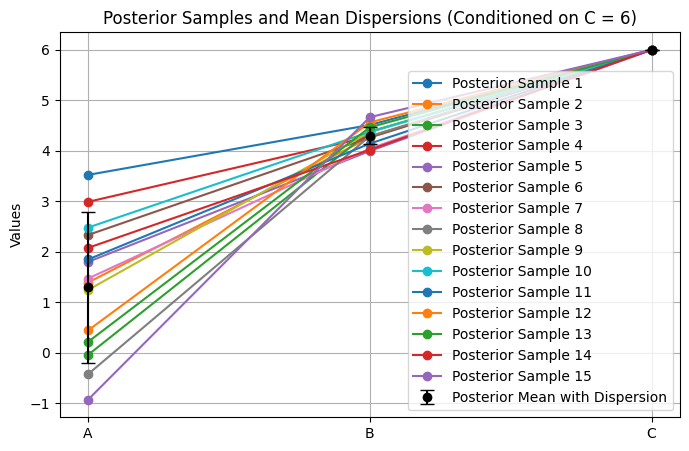

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the Gaussian distributions
means = np.array([1, 4, 3])  # Means of A, B, C
cov_matrix = np.array([
    [1.5**2, 0.9, 0.1],  # Variance and covariance for A, B, C
    [0.9, 0.2**2, 0.1],
    [0.1, 0.1, 1**2]
])  # Covariance matrix

# Extract standard deviations (sqrt of diagonal elements of covariance matrix)
std_devs = np.sqrt(np.diag(cov_matrix))

# Generate samples from the multivariate Gaussian distribution
num_samples = 1000
data = np.random.multivariate_normal(means, cov_matrix, num_samples)
A, B, C = data[:, 0], data[:, 1], data[:, 2]

# Generate a few joint samples from the distribution for visualization
num_samples_to_plot = 15  # Number of joint samples to illustrate
joint_samples = data[:num_samples_to_plot, :]  # Select the first few samples

# Conditioning the distribution on C = 6
C_conditioned = 6

# Extract the covariance matrix components for conditioning on C
Sigma_cc = Sigma[2, 2]
Sigma_cb = Sigma[2, :2]
Sigma_bb = Sigma[:2, :2]

# Compute the mean and covariance of the conditional distribution
mean_b_given_c = means[:2] + Sigma_cb / Sigma_cc * (C_conditioned - means[2])
cov_b_given_c = Sigma_bb - np.outer(Sigma_cb, Sigma_cb) / Sigma_cc

# Generate samples from the posterior distribution
posterior_samples_c = np.random.multivariate_normal(mean_b_given_c, cov_b_given_c, num_samples_to_plot)

# Plot the posterior samples
plt.figure(figsize=(8, 5))

# Plot each posterior sample as a connected line (with C fixed at 6)
for i, sample in enumerate(posterior_samples_c):
    plt.plot(["A", "B", "C"], sample.tolist() + [C_conditioned], marker="o", label=f"Posterior Sample {i+1}")

# Plot the posterior mean with error bars
plt.errorbar(
    ["A", "B", "C"],
    mean_b_given_c.tolist() + [C_conditioned],
    yerr=[np.sqrt(cov_b_given_c[i, i]) for i in range(2)] + [0],
    fmt="o",
    color="black",
    capsize=5,
    label="Posterior Mean with Dispersion"
)

# Add labels, legend, and grid
plt.title("Posterior Samples and Mean Dispersions (Conditioned on C = 6)")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.show()

🔍 Gaussian Conditioning: How Posterior of B and C Changes with the Value of A

This code explores how the **posterior (conditional) distribution of variables B and C** evolves as we **condition on different values of variable A**, in the context of a **multivariate Gaussian distribution**.
We begin with a **correlation matrix** describing the relationships between three Gaussian variables \( A \), \( B \), and \( C \), and then convert this correlation matrix into a **covariance matrix** using the provided standard deviations:

$$
\Sigma = \text{diag}(\sigma) \cdot \text{Corr} \cdot \text{diag}(\sigma)
$$

where \( \sigma = [1.5, 0.2, 1.0] \) are the standard deviations of \( A, B, C \). The mean vector is given as:

$$
\mu = [1, 4, 3]
$$

We then compute the **conditional distribution** of \( [B, C] \) given that \( A = a \), for many values of \( a \) ranging from 0 to 5.

---

🧮 Conditional Gaussian Formulas Used

Given a joint distribution over \( A \) and \( [B, C] \), the conditional distribution of \( [B, C] \mid A = a \) is again Gaussian:

**Conditional mean:**

$$
\mathbb{E}[B, C \mid A = a] = \mu_{BC} + \Sigma_{BC,A} \Sigma_{AA}^{-1} (a - \mu_A)
$$

**Conditional covariance:**

$$
\text{Cov}[B, C \mid A] = \Sigma_{BC,BC} - \Sigma_{BC,A} \Sigma_{AA}^{-1} \Sigma_{A,BC}
$$

These formulas are used in each iteration of the loop, plugging in the current value of \( A \) being conditioned on.

---

📈 What the plot shows:

- The **solid blue and green lines** represent the **posterior means** of \( B \) and \( C \), respectively, as a function of the conditioned value \( A \).
- The **shaded regions** represent **±1 standard deviation** of the conditional (posterior) distributions — that is, the spread or uncertainty in \( B \) and \( C \) after observing \( A = a \).

As we change the value of \( A \), the means of \( B \) and \( C \) shift according to the correlation structure between the variables. The posterior variances remain constant in this case because we are only conditioning on one variable and keeping its variance fixed.

---

This code provides an intuition for how **observing one variable (A)** in a multivariate Gaussian impacts our **belief (mean and uncertainty)** about the others (B and C).

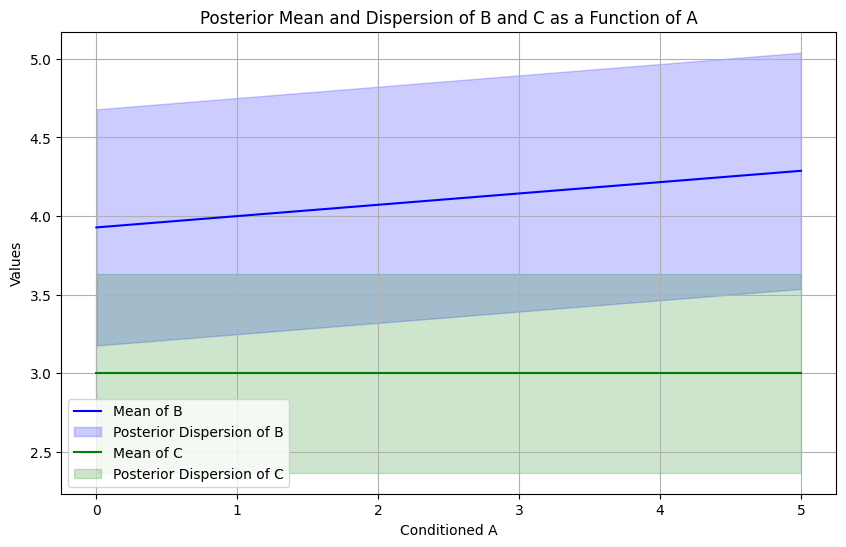

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#try 0.9 vs. 0.09

# Define the initial correlation matrix and convert it to a covariance matrix
correlation_matrix = np.array([
    [1.0, 0.09, 0],  # Correlation coefficients for A, B, C
    [0.09, 0.4, 0.5],
    [0, 0.5, 0.4]
])

# Define standard deviations for A, B, C
std_devs = np.array([1.5, 1.2, 1.0])

# Convert correlation matrix to covariance matrix
cov_matrix = np.diag(std_devs) @ correlation_matrix @ np.diag(std_devs)

# Define the means for A, B, C
means = np.array([1, 4, 3])

# Define the range of A to condition on
A_conditioned_values = np.linspace(0, 5, 100)

# Initialize arrays to store posterior means and standard deviations for B and C
mean_b_given_a_values = []
mean_c_given_a_values = []
std_b_given_a_values = []
std_c_given_a_values = []

# Loop over the values of A to compute conditional statistics for B and C
for A_conditioned in A_conditioned_values:
    # Mean of B and C given A
    mean_given_a = means[1:] + (cov_matrix[1:, 0] / cov_matrix[0, 0]) * (A_conditioned - means[0])
    # Covariance of B and C given A
    cov_given_a = cov_matrix[1:, 1:] - np.outer(cov_matrix[1:, 0], cov_matrix[1:, 0]) / cov_matrix[0, 0]

    # Append mean and standard deviations
    mean_b_given_a_values.append(mean_given_a[0])
    mean_c_given_a_values.append(mean_given_a[1])
    std_b_given_a_values.append(np.sqrt(cov_given_a[0, 0]))
    std_c_given_a_values.append(np.sqrt(cov_given_a[1, 1]))

# Convert lists to numpy arrays
mean_b_given_a_values = np.array(mean_b_given_a_values)
mean_c_given_a_values = np.array(mean_c_given_a_values)
std_b_given_a_values = np.array(std_b_given_a_values)
std_c_given_a_values = np.array(std_c_given_a_values)

# Plot the mean and posterior dispersion for B and C
plt.figure(figsize=(10, 6))

# Mean and dispersion for B
plt.plot(A_conditioned_values, mean_b_given_a_values, label="Mean of B", color="blue")
plt.fill_between(A_conditioned_values,
                 mean_b_given_a_values - std_b_given_a_values,
                 mean_b_given_a_values + std_b_given_a_values,
                 color="blue", alpha=0.2, label="Posterior Dispersion of B")

# Mean and dispersion for C
plt.plot(A_conditioned_values, mean_c_given_a_values, label="Mean of C", color="green")
plt.fill_between(A_conditioned_values,
                 mean_c_given_a_values - std_c_given_a_values,
                 mean_c_given_a_values + std_c_given_a_values,
                 color="green", alpha=0.2, label="Posterior Dispersion of C")

# Labels, legend, and grid
plt.title("Posterior Mean and Dispersion of B and C as a Function of A")
plt.xlabel("Conditioned A")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()



🔄 Conditioning in Multivariate Gaussian: Effect of Variance in the Conditioned Variable

This code illustrates a key concept in multivariate Gaussian distributions: **how the conditional distribution of some variables (B and C) changes depending on the variance of another variable (A)** we are conditioning on.

We start with a 3-dimensional Gaussian distribution over variables \( A, B, C \), specified by:

- A **mean vector** \( \boldsymbol{\mu} = [1, 4, 3] \)
- A **covariance matrix**:

$$
\Sigma =
\begin{bmatrix}
\text{Var}(A) & \text{Cov}(A, B) & \text{Cov}(A, C) \\
\text{Cov}(B, A) & \text{Var}(B) & \text{Cov}(B, C) \\
\text{Cov}(C, A) & \text{Cov}(C, B) & \text{Var}(C)
\end{bmatrix}
$$

In this code, we explore what happens to the conditional mean and standard deviation (dispersion) of \( B \) and \( C \) **as the variance of \( A \) decreases**, ranging from 4 down to 0.1.

---

🧮 What is being computed?

For each value of \( \text{Var}(A) \), we compute the **conditional distribution of \( B, C \mid A = 2 \)** using the Gaussian conditioning formulas:

**Conditional mean:**

Let \( \mu = \begin{bmatrix} \mu_A \\ \mu_{BC} \end{bmatrix} \), and \( \Sigma = \begin{bmatrix} \Sigma_{AA} & \Sigma_{A,BC} \\ \Sigma_{BC,A} & \Sigma_{BC,BC} \end{bmatrix} \)

Then the conditional mean of \( B \) and \( C \) given \( A = a \) is:

$$
\mathbb{E}[B, C \mid A = a] = \mu_{BC} + \Sigma_{BC,A} \Sigma_{AA}^{-1} (a - \mu_A)
$$

**Conditional covariance:**

$$
\text{Cov}[B, C \mid A] = \Sigma_{BC,BC} - \Sigma_{BC,A} \Sigma_{AA}^{-1} \Sigma_{A,BC}
$$

These are computed for each value of \( \text{Var}(A) \), while keeping the covariances between variables fixed.

---

📈 What the plot shows:

- The **solid lines** show the **conditional means** of \( B \) (blue) and \( C \) (green) as the variance of \( A \) changes.
- The **shaded regions** around each mean represent **±1 standard deviation** of the conditional distribution, derived from the conditional covariance.
- As \( \text{Var}(A) \to 0 \), the influence of \( A = 2 \) becomes dominant, and the conditional variance of \( B \) and \( C \) shrinks (i.e., the distribution collapses to a line).
- As \( \text{Var}(A) \) increases, the conditional influence of \( A \) weakens, and \( B \), \( C \) revert toward their marginal distributions.

---

This is an illustration of how **information content in conditioning variables** (captured by their variance) impacts uncertainty in the conditional distribution. It mirrors what happens in Bayesian inference, Kalman filtering, and Gaussian process regression.


<ipython-input-14-ef70dc5395e5>:42: RuntimeWarning: invalid value encountered in sqrt
  std_b_given_a_values.append(np.sqrt(cov_given_a[0, 0]))


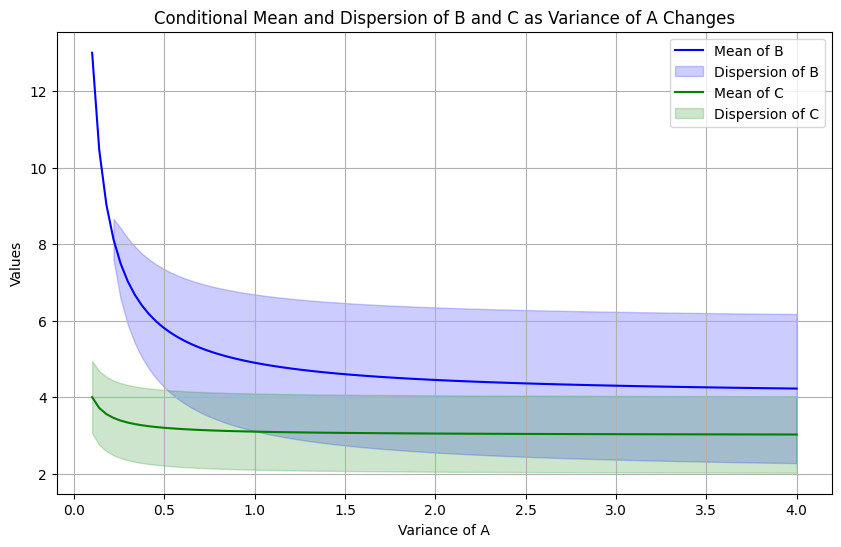

In [ ]:
# Initialize all parameters at the beginning
import numpy as np
import matplotlib.pyplot as plt

# Means of A, B, C
means = np.array([1, 4, 3])

# Covariance matrix of A, B, C
cov_matrix = np.array([
    [1.5**2, 0.9, 0.1],
    [0.9, 2**2, 0.1],
    [0.1, 0.1, 1**2]
])

# Range of variances for A (from 4 to a small positive value)
variance_a_values = np.linspace(4, 0.1, 100)

# Fixed value of A
A_conditioned = 2

# Initialize arrays to store posterior means and standard deviations for B and C
mean_b_given_a_values = []
mean_c_given_a_values = []
std_b_given_a_values = []
std_c_given_a_values = []

# Main calculation loop for conditional statistics
for variance_a in variance_a_values:
    # Update the variance of A in the covariance matrix
    cov_matrix_updated = cov_matrix.copy()
    cov_matrix_updated[0, 0] = variance_a  # Update variance of A

    # Compute the mean of B and C given A
    mean_given_a = means[1:] + (cov_matrix_updated[1:, 0] / variance_a) * (A_conditioned - means[0])

    # Compute the covariance of B and C given A
    cov_given_a = cov_matrix_updated[1:, 1:] - np.outer(cov_matrix_updated[1:, 0], cov_matrix_updated[1:, 0]) / variance_a

    # Append mean and standard deviations
    mean_b_given_a_values.append(mean_given_a[0])
    mean_c_given_a_values.append(mean_given_a[1])
    std_b_given_a_values.append(np.sqrt(cov_given_a[0, 0]))
    std_c_given_a_values.append(np.sqrt(cov_given_a[1, 1]))

# Convert lists to numpy arrays
mean_b_given_a_values = np.array(mean_b_given_a_values)
mean_c_given_a_values = np.array(mean_c_given_a_values)
std_b_given_a_values = np.array(std_b_given_a_values)
std_c_given_a_values = np.array(std_c_given_a_values)

# Plot the conditional means and dispersions for B and C
plt.figure(figsize=(10, 6))

# Plot mean and dispersion for B
plt.plot(variance_a_values, mean_b_given_a_values, label="Mean of B", color="blue")
plt.fill_between(variance_a_values,
                 mean_b_given_a_values - std_b_given_a_values,
                 mean_b_given_a_values + std_b_given_a_values,
                 color="blue", alpha=0.2, label="Dispersion of B")

# Plot mean and dispersion for C
plt.plot(variance_a_values, mean_c_given_a_values, label="Mean of C", color="green")
plt.fill_between(variance_a_values,
                 mean_c_given_a_values - std_c_given_a_values,
                 mean_c_given_a_values + std_c_given_a_values,
                 color="green", alpha=0.2, label="Dispersion of C")

# Add labels, legend, and grid
plt.title("Conditional Mean and Dispersion of B and C as Variance of A Changes")
plt.xlabel("Variance of A")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()



# From 3 to Many: Gaussian Process

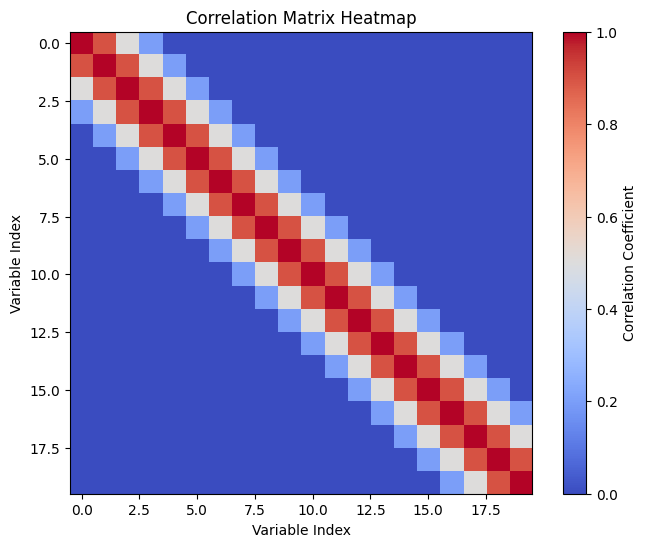

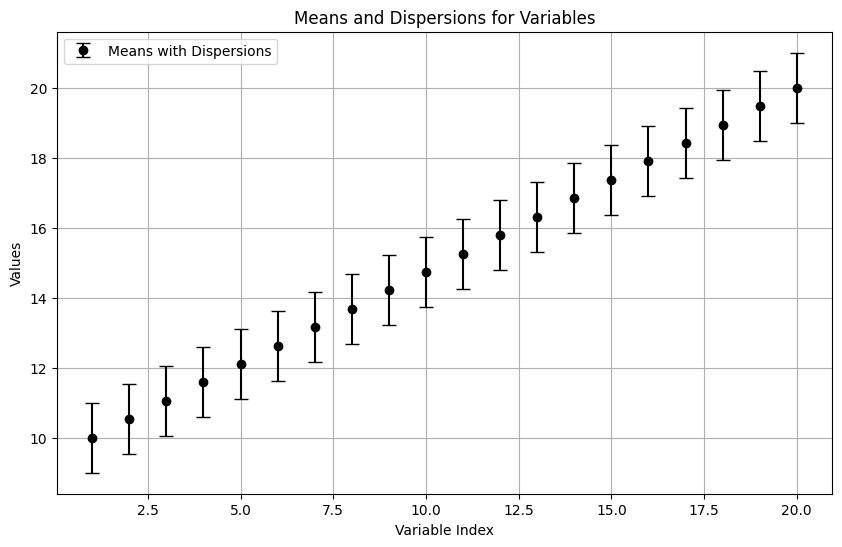

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
num_vars = 20  # Number of variables
means = np.linspace(10, 20, num_vars)  # Means are linearly spaced from 10 to 20

# Initialize correlation matrix
correlation_matrix = np.zeros((num_vars, num_vars))
for i in range(num_vars):
    for j in range(num_vars):
        if i == j:
            correlation_matrix[i, j] = 1.0  # Main diagonal
        elif abs(i - j) == 1:
            correlation_matrix[i, j] = 0.9  # First off-diagonal
        elif abs(i - j) == 2:
            correlation_matrix[i, j] = 0.5  # Second off-diagonal
        elif abs(i - j) == 3:
            correlation_matrix[i, j] = 0.2  # Second off-diagonal

# Ensure the matrix is symmetric
correlation_matrix = (correlation_matrix + correlation_matrix.T) / 2

# Generate covariance matrix by scaling with arbitrary variances
variances = np.linspace(1, 1, num_vars)  # Variances for each variable
covariance_matrix = correlation_matrix * np.outer(variances, variances)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Variable Index")
plt.ylabel("Variable Index")
plt.grid(False)
plt.show()

# Plot means and dispersions
plt.figure(figsize=(10, 6))
x_indices = np.arange(1, num_vars + 1)
plt.errorbar(x_indices, means, yerr=np.sqrt(variances), fmt="o", color="black", capsize=5, label="Means with Dispersions")
plt.title("Means and Dispersions for Variables")
plt.xlabel("Variable Index")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.show()


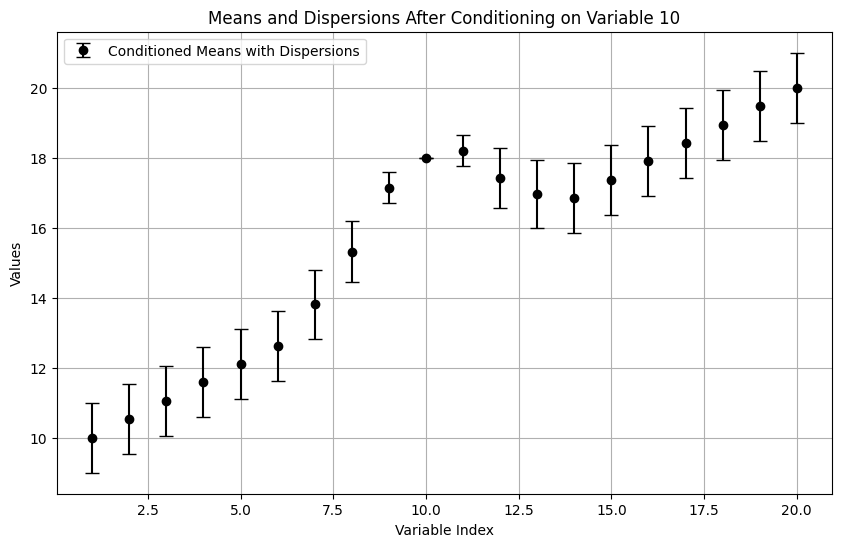

In [ ]:
# Conditioning on variable 10 (index 9 in zero-based indexing) to have a value of 18
conditioned_index = 9
conditioned_value = 18

# Compute the conditional mean and covariance
# Partition the covariance matrix and mean vector
indices = np.arange(num_vars)
other_indices = indices[indices != conditioned_index]

mean_cond = means[other_indices] + (
    covariance_matrix[other_indices, conditioned_index]
    / covariance_matrix[conditioned_index, conditioned_index]
) * (conditioned_value - means[conditioned_index])

cov_cond = (
    covariance_matrix[np.ix_(other_indices, other_indices)]
    - np.outer(
        covariance_matrix[other_indices, conditioned_index],
        covariance_matrix[other_indices, conditioned_index],
    )
    / covariance_matrix[conditioned_index, conditioned_index]
)

# Create a full conditioned mean and variances array for all variables
conditioned_means = means.copy()
conditioned_means[other_indices] = mean_cond
conditioned_means[conditioned_index] = conditioned_value

conditioned_variances = np.zeros(num_vars)
conditioned_variances[conditioned_index] = 0  # Variance for conditioned variable is 0
conditioned_variances[other_indices] = np.diag(cov_cond)

# Plot the conditioned means and dispersions
plt.figure(figsize=(10, 6))
x_indices = np.arange(1, num_vars + 1)
plt.errorbar(
    x_indices,
    conditioned_means,
    yerr=np.sqrt(conditioned_variances),
    fmt="o",
    color="black",
    capsize=5,
    label="Conditioned Means with Dispersions",
)
plt.title("Means and Dispersions After Conditioning on Variable 10")
plt.xlabel("Variable Index")
plt.ylabel("Values")
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-17-821dd2144f63>:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  original_samples = np.random.multivariate_normal(means, covariance_matrix, num_samples)
<ipython-input-17-821dd2144f63>:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  conditioned_samples[i, other_indices] = np.random.multivariate_normal(mean_cond, cov_cond)


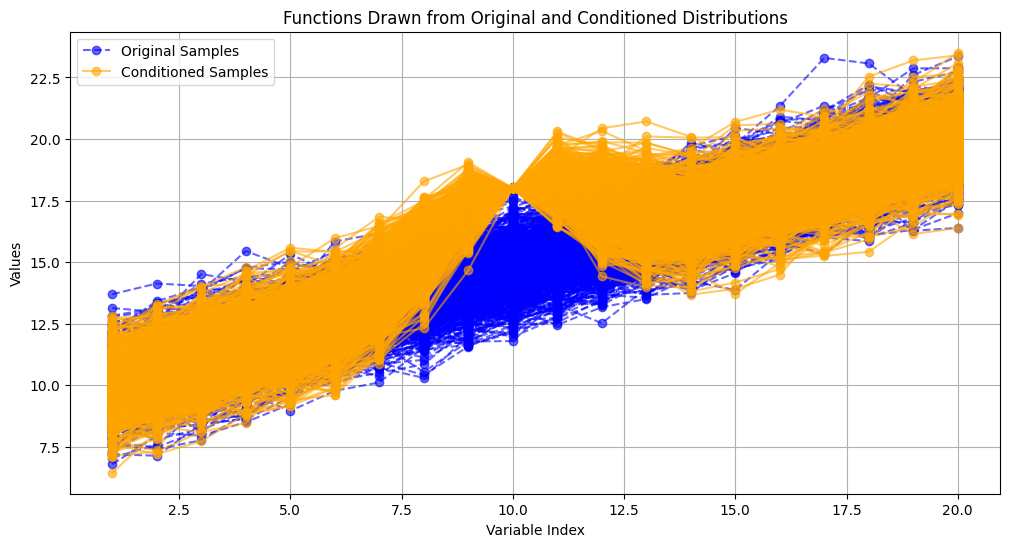

In [ ]:
# Correcting the sampling to ensure variable 10 is fixed at 18 in the conditioned samples
# Original samples
original_samples = np.random.multivariate_normal(means, covariance_matrix, num_samples)

# Conditioned samples
conditioned_samples = np.zeros((num_samples, num_vars))

# Set variable 10 to 18 for all conditioned samples
conditioned_samples[:, conditioned_index] = conditioned_value

# Sample the remaining variables from the conditioned distribution
for i in range(num_samples):
    conditioned_samples[i, other_indices] = np.random.multivariate_normal(mean_cond, cov_cond)

# Plot the original and conditioned samples
plt.figure(figsize=(12, 6))

# Plot original samples
for i, sample in enumerate(original_samples):
    plt.plot(
        np.arange(1, num_vars + 1),
        sample,
        marker="o",
        linestyle="--",
        label="Original Samples" if i == 0 else "",
        color="blue",
        alpha=0.6,
    )

# Plot conditioned samples
for i, sample in enumerate(conditioned_samples):
    plt.plot(
        np.arange(1, num_vars + 1),
        sample,
        marker="o",
        linestyle="-",
        label="Conditioned Samples" if i == 0 else "",
        color="orange",
        alpha=0.6,
    )

# Add plot details
plt.title("Functions Drawn from Original and Conditioned Distributions")
plt.xlabel("Variable Index")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


# GPyTorch

In [ ]:
!pip install gpytorch

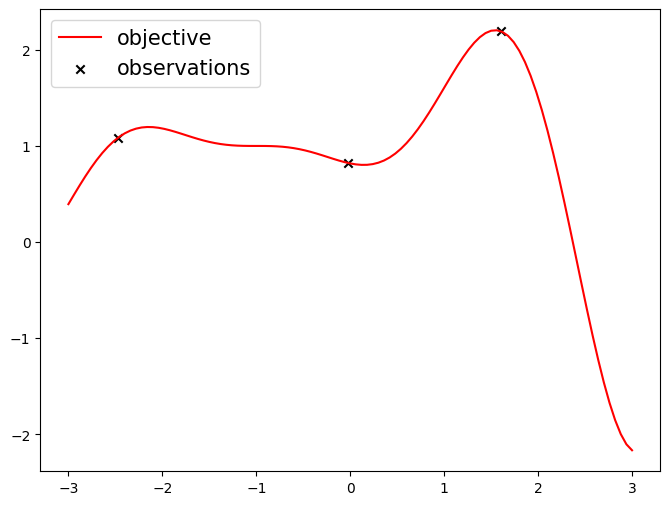

In [ ]:
import torch
import matplotlib.pyplot as plt

def forrester_1d(x):
    y = -((x + 1) ** 2) * torch.sin(2 * x + 2) / 5 + 1
    return y.squeeze(-1)

xs = torch.linspace(-3, 3, 101).unsqueeze(1)
ys = forrester_1d(xs)

torch.manual_seed(0)
train_x = torch.rand(size=(3, 1)) * 6 - 3
train_y = forrester_1d(train_x)

plt.figure(figsize=(8, 6))

plt.plot(xs, ys, label="objective", c="r")
plt.scatter(train_x, train_y, marker="x", c="k", label="observations")

plt.legend(fontsize=15);

In [ ]:
import gpytorch

class BaseGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = BaseGPModel(None, None, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [ ]:
with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_lower, predictive_upper = predictive_distribution.confidence_region()

    torch.manual_seed(0)
    samples = predictive_distribution.sample(torch.Size([5]))

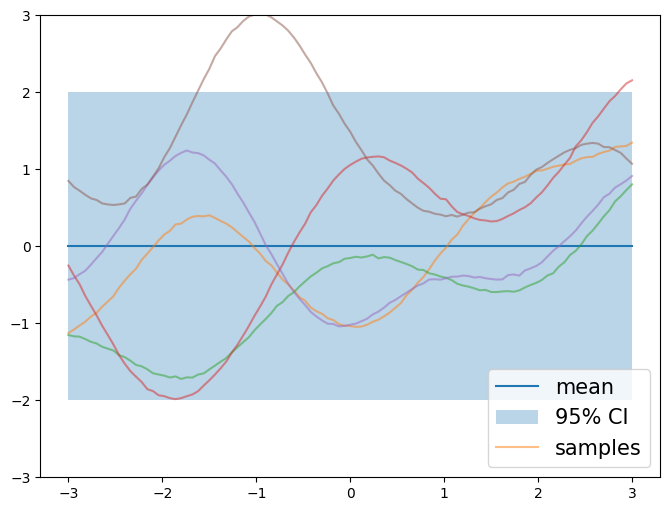

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(xs, predictive_mean.detach(), label="mean")
plt.fill_between(xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95% CI")
plt.plot(xs, samples[0, :], alpha=0.5, label="samples")

for i in range(1, samples.shape[0]):
    plt.plot(xs, samples[i, :], alpha=0.5)

plt.ylim(-3, 3)

plt.legend(fontsize=15);

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = BaseGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

In [ ]:
with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_lower, predictive_upper = predictive_distribution.confidence_region()

    torch.manual_seed(0)
    samples = predictive_distribution.sample(torch.Size([5]))

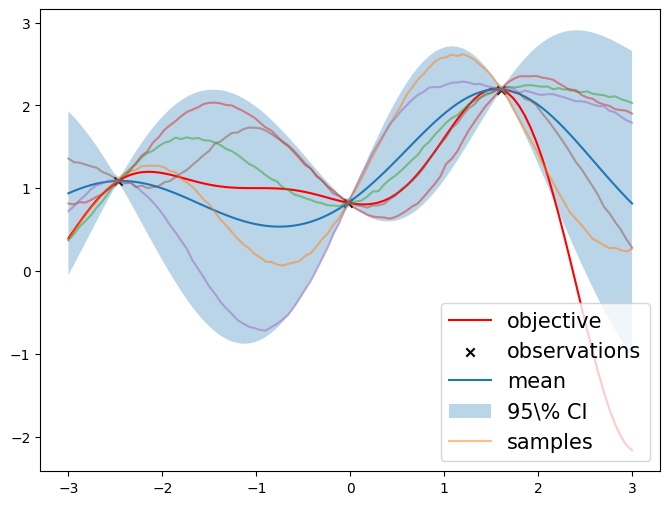

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(xs, ys, label="objective", c="r")
plt.scatter(train_x, train_y, marker="x", c="k", label="observations")

plt.plot(xs, predictive_mean, label="mean")
plt.fill_between(xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95\% CI")

plt.plot(xs, samples[0, :], alpha=0.5, label="samples")

for i in range(1, samples.shape[0]):
    plt.plot(xs, samples[i, :], alpha=0.5)

plt.legend(fontsize=15);

In [ ]:
train_x = torch.tensor([[0.0, 0.0], [1.0, 2.0], [-1.0, 1.0]])

train_y = torch.tensor([0.0, -1.0, 0.5])
grid_x = torch.linspace(-3, 3, 101)

grid_x1, grid_x2 = torch.meshgrid(grid_x, grid_x, indexing="ij")
xs = torch.vstack([grid_x1.flatten(), grid_x2.flatten()]).transpose(-1, -2)
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = BaseGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

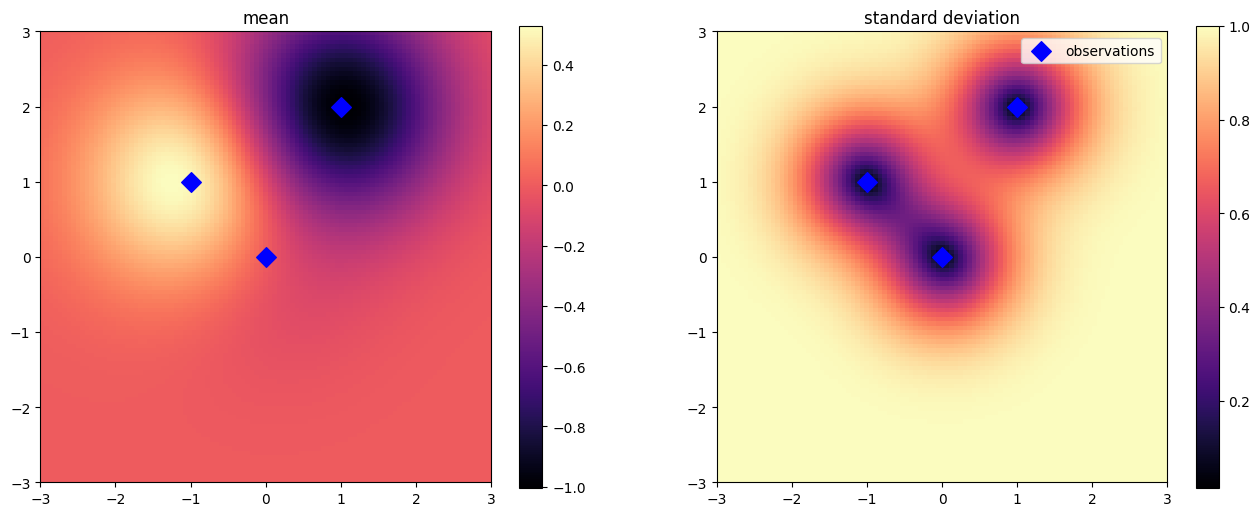

In [ ]:
with torch.no_grad():
    predictive_distribution = likelihood(model(xs))
    predictive_mean = predictive_distribution.mean
    predictive_stddev = predictive_distribution.stddev
plt.rcParams["image.cmap"] = "magma"
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

c = ax[0].imshow(
    predictive_mean.detach().reshape(101, 101).transpose(-1, -2),
    origin="lower",
    extent=[-3, 3, -3, 3],
)
plt.colorbar(c, ax=ax[0])

ax[0].scatter(train_x[:, 0], train_x[:, 1], c="blue", marker="D", s=100)

ax[0].set_title("mean")

c = ax[1].imshow(
    predictive_stddev.detach().reshape(101, 101).transpose(-1, -2),
    origin="lower",
    extent=[-3, 3, -3, 3],
)
plt.colorbar(c, ax=ax[1])

ax[1].scatter(
    train_x[:, 0], train_x[:, 1], c="blue", marker="D", s=100, label="observations"
)

ax[1].set_title("standard deviation")

ax[1].legend()

plt.show()

# Bernoulli likelihood

Iter 1/200 - Loss: 0.908
Iter 21/200 - Loss: 0.607
Iter 41/200 - Loss: 0.533
Iter 61/200 - Loss: 0.522
Iter 81/200 - Loss: 0.521
Iter 101/200 - Loss: 0.520
Iter 121/200 - Loss: 0.520
Iter 141/200 - Loss: 0.520
Iter 161/200 - Loss: 0.520
Iter 181/200 - Loss: 0.520


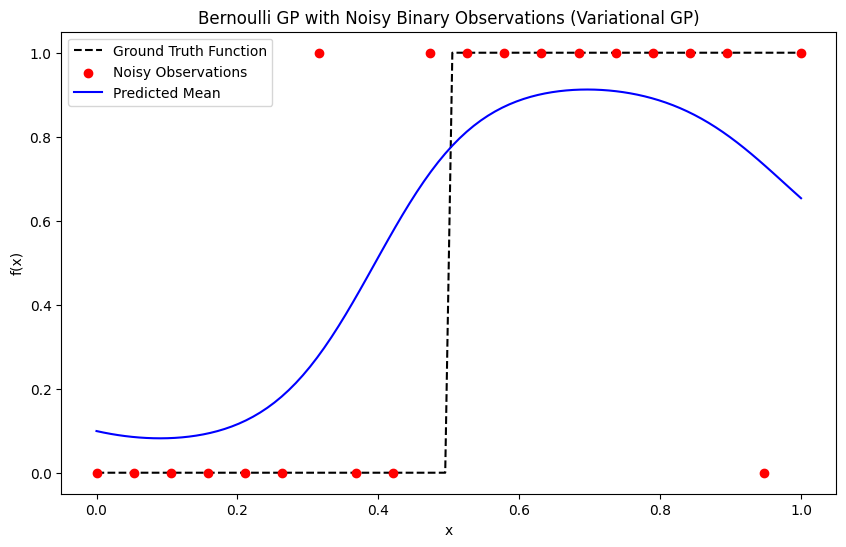

In [ ]:
import torch
import gpytorch
import matplotlib.pyplot as plt

# 1. Define the ground truth function
def ground_truth_function(x):
    return (x > 0.5).float()  # Returns 0 for x <= 0.5 and 1 for x > 0.5

# Generate training data
torch.manual_seed(42)
train_x = torch.linspace(0, 1, 20)  # 20 training points in [0, 1]
train_y = ground_truth_function(train_x)  # Binary ground truth
# Add noise: flip some labels with probability 0.1
noise = torch.bernoulli(0.3 * torch.ones_like(train_y))  # Flip labels with 10% probability
train_y_noisy = (train_y + noise) % 2  # Add noise by flipping 0 to 1 or 1 to 0

# 2. Define the Variational GP Model
class BernoulliGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Define inducing points for variational inference
inducing_points = torch.linspace(0, 1, 10).unsqueeze(-1)

# Instantiate the Bernoulli GP model
likelihood = gpytorch.likelihoods.BernoulliLikelihood()
model = BernoulliGPModel(inducing_points)

# 3. Train the model
model.train()
likelihood.train()

# Define optimizer and loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y_noisy.size(0))

# Training loop
training_iter = 200
for i in range(training_iter):
    optimizer.zero_grad()
    output = model(train_x.unsqueeze(-1))
    loss = -mll(output, train_y_noisy)
    loss.backward()
    optimizer.step()
    if i % 20 == 0:
        print(f"Iter {i + 1}/{training_iter} - Loss: {loss.item():.3f}")

# 4. Evaluate the model
model.eval()
likelihood.eval()

# Generate test points
test_x = torch.linspace(0, 1, 100).unsqueeze(-1)

# Predict probabilities for the test points
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    posterior = likelihood(model(test_x))  # Predict posterior probabilities
    pred_mean = posterior.mean  # Mean probabilities
#    pred_lower, pred_upper = posterior.confidence_region()  # Confidence intervals

# 5. Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_x.numpy(), ground_truth_function(test_x).numpy(), 'k--', label="Ground Truth Function")
plt.scatter(train_x.numpy(), train_y_noisy.numpy(), color='red', label="Noisy Observations", zorder=10)
plt.plot(test_x.numpy(), pred_mean.numpy(), label="Predicted Mean", color='blue')
#plt.fill_between(test_x.numpy().squeeze(), pred_lower.numpy(), pred_upper.numpy(), color='blue', alpha=0.2, label="Confidence Region")
plt.title("Bernoulli GP with Noisy Binary Observations (Variational GP)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()



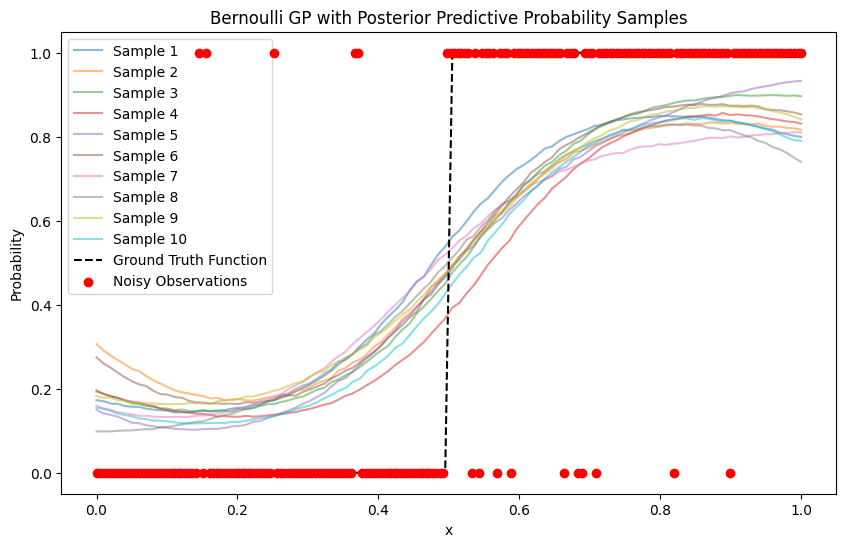

In [ ]:
import torch
import gpytorch
import matplotlib.pyplot as plt

# Define the ground truth function
def ground_truth_function(x):
    return (x > 0.5).float()  # Returns 0 for x <= 0.5 and 1 for x > 0.5

# Generate training data
torch.manual_seed(42)
train_x = torch.linspace(0, 1, 200)  # 20 training points in [0, 1]
train_y = ground_truth_function(train_x)  # Binary ground truth
# Add noise: flip some labels with probability 0.1
noise = torch.bernoulli(0.1 * torch.ones_like(train_y))  # Flip labels with 10% probability
train_y_noisy = (train_y + noise) % 2  # Add noise by flipping 0 to 1 or 1 to 0

# Define the Variational GP Model
class BernoulliGPModel(gpytorch.models.ApproximateGP):
    def __init__(self, inducing_points):
        variational_distribution = gpytorch.variational.CholeskyVariationalDistribution(inducing_points.size(0))
        variational_strategy = gpytorch.variational.VariationalStrategy(
            self, inducing_points, variational_distribution, learn_inducing_locations=True
        )
        super().__init__(variational_strategy)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# Define inducing points for variational inference
inducing_points = torch.linspace(0, 1, 10).unsqueeze(-1)

# Instantiate the Bernoulli GP model
likelihood = gpytorch.likelihoods.BernoulliLikelihood()
model = BernoulliGPModel(inducing_points)

# Train the model
model.train()
likelihood.train()

# Define optimizer and loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.VariationalELBO(likelihood, model, num_data=train_y_noisy.size(0))

# Training loop
training_iter = 200
for i in range(training_iter):
    optimizer.zero_grad()
    output = model(train_x.unsqueeze(-1))
    loss = -mll(output, train_y_noisy)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
likelihood.eval()

# Generate test points
test_x = torch.linspace(0, 1, 100).unsqueeze(-1)

# Predict probabilities for the test points
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    posterior = model(test_x)  # Predict posterior latent function
    sampled_latents = posterior.rsample(torch.Size([10]))  # Sample 10 latent functions
    sampled_probs = torch.sigmoid(sampled_latents)  # Apply sigmoid to get probabilities

# Plot the results
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot 10 sampled probability curves
    plt.plot(test_x.numpy(), sampled_probs[i].numpy(), alpha=0.5, label=f"Sample {i+1}")

plt.plot(test_x.numpy(), ground_truth_function(test_x).numpy(), 'k--', label="Ground Truth Function")
plt.scatter(train_x.numpy(), train_y_noisy.numpy(), color='red', label="Noisy Observations", zorder=10)
plt.title("Bernoulli GP with Posterior Predictive Probability Samples")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.show()


# Kernel engineering

### Define kernel

In [ ]:
import torch
import gpytorch

from math import pi

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "Blues_r"

from tqdm.notebook import tqdm

In [ ]:
def forrester_1d(x):
    # a modification of https://www.sfu.ca/~ssurjano/forretal08.html
    y = -((x + 1) ** 2) * torch.sin(2 * x + 2) / 5 + 1
    return y.squeeze(-1)


def visualize_gp_belief(model, likelihood, num_samples=5):
    with torch.no_grad():
        predictive_distribution = likelihood(model(xs))
        predictive_mean = predictive_distribution.mean
        predictive_upper, predictive_lower = predictive_distribution.confidence_region()

    plt.figure(figsize=(8, 6))

    plt.plot(xs, ys, label="objective", c="r")
    plt.scatter(train_x, train_y, marker="x", c="k", label="observations")

    plt.plot(xs, predictive_mean, label="mean")
    plt.fill_between(
        xs.flatten(), predictive_upper, predictive_lower, alpha=0.3, label="95% CI"
    )

    torch.manual_seed(0)
    for i in range(num_samples):
        plt.plot(xs, predictive_distribution.sample(), alpha=0.5, linewidth=2)

    plt.legend(fontsize=15)
    plt.show()

In [ ]:
xs = torch.linspace(-3, 3, 101).unsqueeze(1)
ys = forrester_1d(xs)

torch.manual_seed(0)
train_x = torch.rand(size=(3, 1)) * 6 - 3
train_y = forrester_1d(train_x)

In [ ]:
class ScaleGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

This code sets up a Gaussian Process (GP) regression model using the `gpytorch` library, with fixed hyperparameters for educational or diagnostic purposes. The `lengthscale`, `outputscale`, and `noise` variables define the behavior of the GP kernel and likelihood. The lengthscale controls how quickly the function can vary with input — a smaller value leads to sharper, more rapid changes, while a larger value makes the GP smoother. The outputscale determines the vertical amplitude or variability of the GP's predictions. The noise term defines the assumed observational noise level in the data; setting it to a small value like `1e-4` approximates a nearly noise-free interpolation.

The model is created using `ScaleGPModel`, a custom GP class based on `gpytorch.models.ExactGP` which wraps a scaled kernel such as RBF. The `GaussianLikelihood` assumes that observations are real-valued and corrupted by Gaussian noise. Instead of learning the hyperparameters through optimization, the code manually sets them by assigning values to the model's kernel and likelihood objects. This allows the user to explicitly control the GP's behavior and observe how the shape of the predictive distribution changes.

After setting the parameters, the model is switched to evaluation mode using `.eval()`, which disables training-specific behavior like gradient tracking. Finally, the `visualize_gp_belief` function is called, which likely plots the GP’s posterior mean and uncertainty (typically shown as shaded regions), along with the training data points.


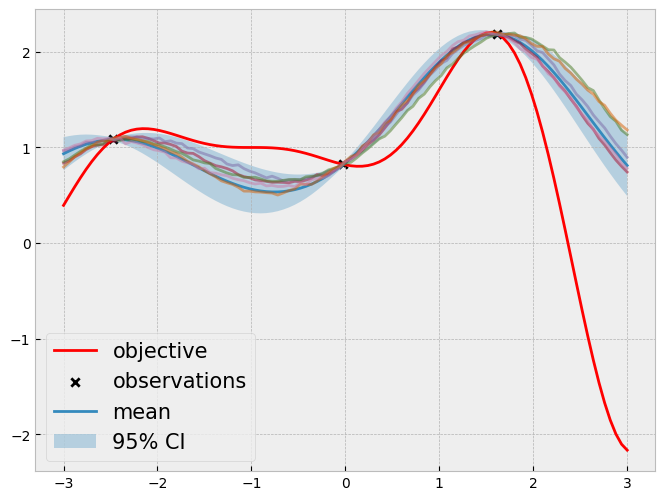

In [ ]:
# declare the GP
lengthscale = 1  # 0.3, 1, 3
outputscale = 0.03  # 0.3, 1, 3
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ScaleGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.base_kernel.lengthscale = lengthscale
model.covar_module.outputscale = outputscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)
#model.likelihood.noise

### Train kernel parameters

In [ ]:
# train the hyperparameter (the constant)
optimizer = torch.optim.Adam(model.covar_module.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

losses = []
lengthscales = []
outputscales = []

for i in tqdm(range(500)):
    optimizer.zero_grad()

    output = model(train_x)
    loss = -mll(output, train_y)

    loss.backward()

    losses.append(loss.item())
    lengthscales.append(model.covar_module.base_kernel.lengthscale.item())
    outputscales.append(model.covar_module.outputscale.item())

    optimizer.step()

model.eval()
likelihood.eval()

  0%|          | 0/500 [00:00<?, ?it/s]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

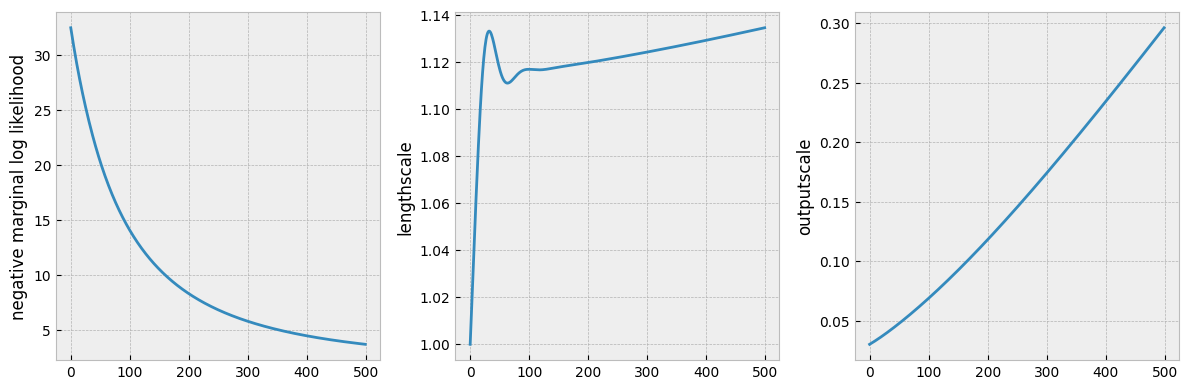

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(losses)
ax[0].set_ylabel("negative marginal log likelihood")

ax[1].plot(lengthscales)
ax[1].set_ylabel("lengthscale")

ax[2].plot(outputscales)
ax[2].set_ylabel("outputscale")

plt.tight_layout();

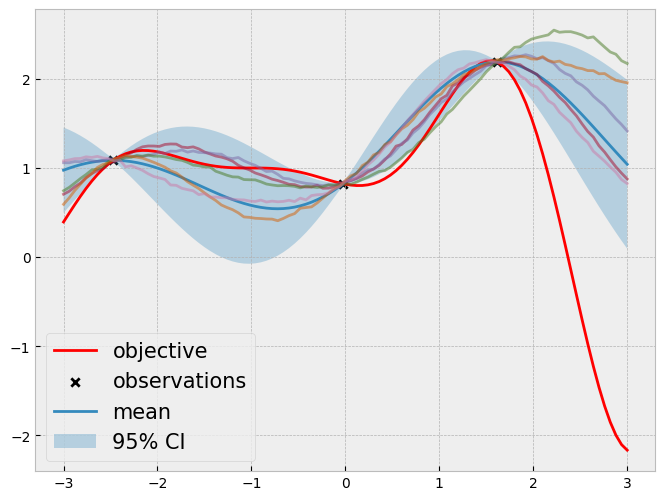

In [ ]:
visualize_gp_belief(model, likelihood)

### Experiment with kernel types

In [ ]:
class RBFGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.RBFKernel()

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

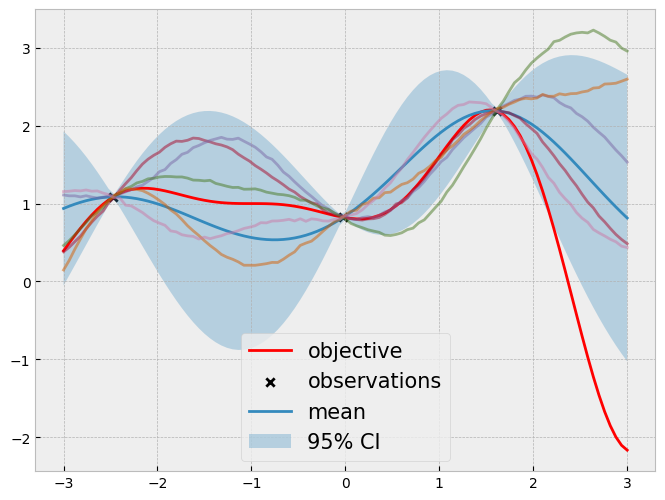

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = RBFGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)

In [ ]:
class MaternGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood, nu):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.MaternKernel(nu)

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

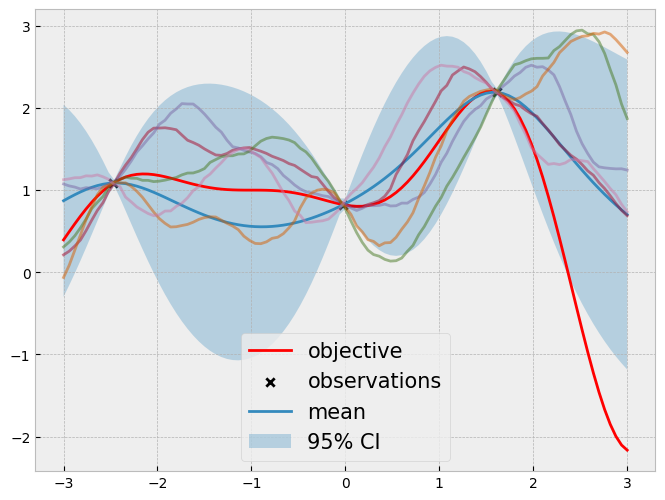

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = MaternGPModel(train_x, train_y, likelihood, 2.5)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)

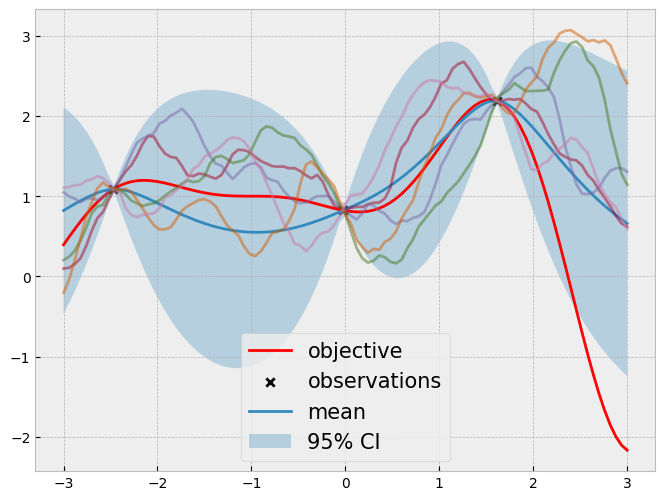

In [ ]:
# declare the GP
lengthscale = 1
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = MaternGPModel(train_x, train_y, likelihood, 1.5)

# fix the hyperparameters
model.covar_module.lengthscale = lengthscale
model.likelihood.noise = noise

model.eval()
likelihood.eval()

visualize_gp_belief(model, likelihood)

# Go 2D!

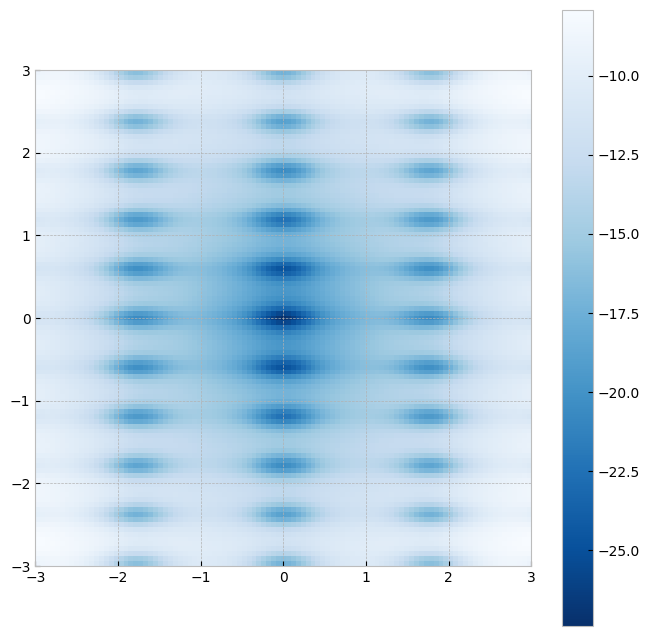

In [ ]:
def ackley(x):
    # a modification of https://www.sfu.ca/~ssurjano/ackley.html
    return -20 * torch.exp(
        -0.2 * torch.sqrt((x[:, 0] ** 2 + x[:, 1] ** 2) / 2)
    ) - torch.exp(torch.cos(2 * pi * x[:, 0] / 3) + torch.cos(2 * pi * x[:, 1]))


xs = torch.linspace(-5, 5, 101)
x1, x2 = torch.meshgrid(xs, xs, indexing="ij")
xs = torch.vstack((x1.flatten(), x2.flatten())).transpose(-1, -2)
ys = ackley(xs)

plt.figure(figsize=(8, 8))

plt.imshow(ys.reshape(101, 101).T, origin="lower", extent=[-3, 3, -3, 3])
plt.colorbar();

In [ ]:
torch.manual_seed(0)
train_x = torch.rand(size=(100, 2)) * 6 - 3
train_y = ackley(train_x)

In [ ]:
class ARDGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super().__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(ard_num_dims=2)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [ ]:
# declare the GP
noise = 1e-4

likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = ARDGPModel(train_x, train_y, likelihood)

# fix the hyperparameters
model.likelihood.noise = noise

# train the hyperparameter (the constant)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

model.train()
likelihood.train()

losses = []
x_lengthscales = []
y_lengthscales = []
outputscales = []
for i in tqdm(range(500)):
    optimizer.zero_grad()

    output = model(train_x)
    loss = -mll(output, train_y)

    loss.backward()

    losses.append(loss.item())
    x_lengthscales.append(model.covar_module.base_kernel.lengthscale[0, 0].item())
    y_lengthscales.append(model.covar_module.base_kernel.lengthscale[0, 1].item())
    outputscales.append(model.covar_module.outputscale.item())

    optimizer.step()

model.eval()
likelihood.eval()

  0%|          | 0/500 [00:00<?, ?it/s]

GaussianLikelihood(
  (noise_covar): HomoskedasticNoise(
    (raw_noise_constraint): GreaterThan(1.000E-04)
  )
)

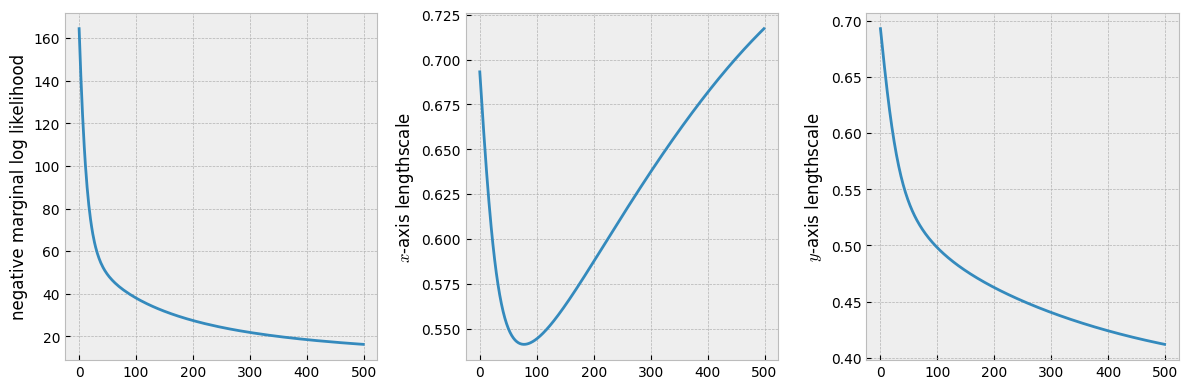

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].plot(losses)
ax[0].set_ylabel("negative marginal log likelihood")

ax[1].plot(x_lengthscales)
ax[1].set_ylabel(r"$x$-axis lengthscale")

ax[2].plot(y_lengthscales)
ax[2].set_ylabel(r"$y$-axis lengthscale")

plt.tight_layout();

In [ ]:
model.covar_module.base_kernel.lengthscale

tensor([[0.7175, 0.4117]], grad_fn=<SoftplusBackward0>)

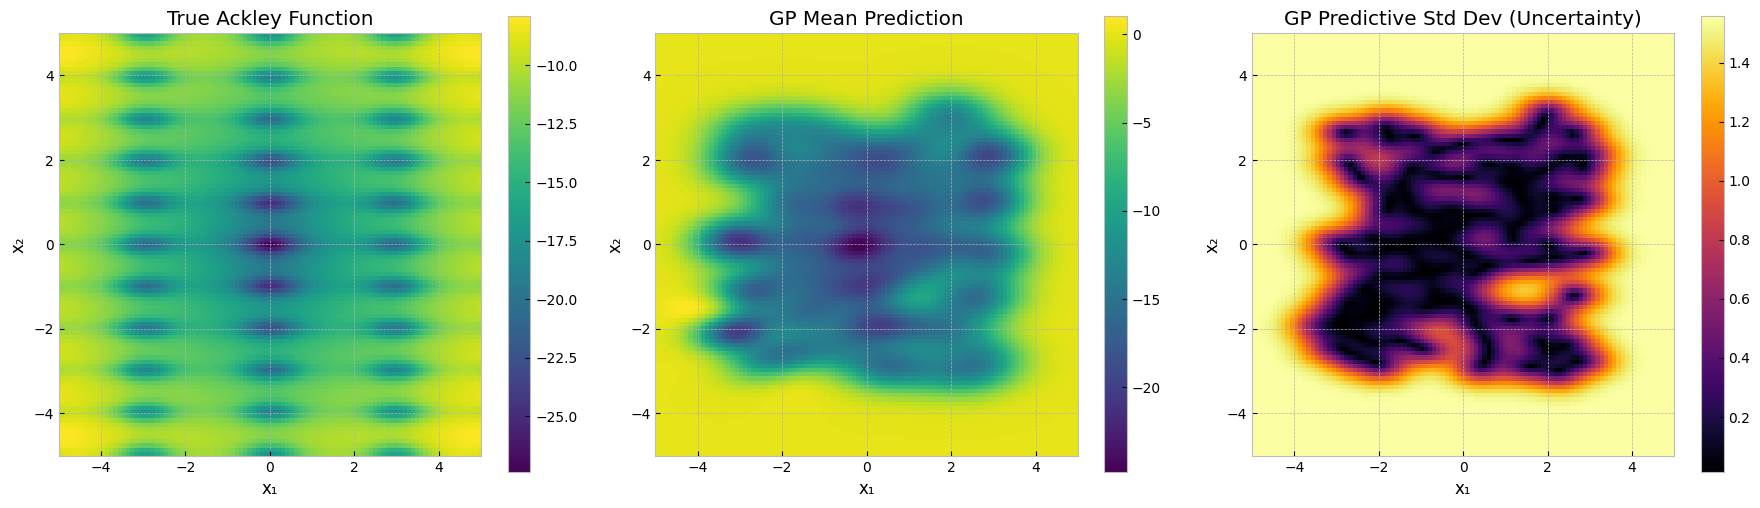

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from math import pi

'''
# Ackley function definition
def ackley(x):
    return -20 * torch.exp(-0.2 * torch.sqrt((x[:, 0] ** 2 + x[:, 1] ** 2) / 2)) - \
           torch.exp(torch.cos(2 * pi * x[:, 0] / 3) + torch.cos(2 * pi * x[:, 1]))
'''

# Create input grid
xs = torch.linspace(-5, 5, 101)
x1, x2 = torch.meshgrid(xs, xs, indexing="ij")
grid = torch.stack([x1.reshape(-1), x2.reshape(-1)], dim=-1)

# Evaluate Ackley function
ys = ackley(grid)

# GP predictions
model.eval()
likelihood.eval()
with torch.no_grad():
    preds = likelihood(model(grid))
    mean = preds.mean.reshape(101, 101).numpy()
    std = preds.stddev.reshape(101, 101).numpy()

# Plot side-by-side
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# True function
axs[0].imshow(ys.reshape(101, 101).T, extent=[-5, 5, -5, 5], origin="lower", cmap="viridis")
axs[0].set_title("True Ackley Function")
axs[0].set_xlabel("x₁")
axs[0].set_ylabel("x₂")
fig.colorbar(axs[0].images[0], ax=axs[0])

# GP mean
axs[1].imshow(mean.T, extent=[-5, 5, -5, 5], origin="lower", cmap="viridis")
axs[1].set_title("GP Mean Prediction")
axs[1].set_xlabel("x₁")
axs[1].set_ylabel("x₂")
fig.colorbar(axs[1].images[0], ax=axs[1])

# GP uncertainty
axs[2].imshow(std.T, extent=[-5, 5, -5, 5], origin="lower", cmap="inferno")
axs[2].set_title("GP Predictive Std Dev (Uncertainty)")
axs[2].set_xlabel("x₁")
axs[2].set_ylabel("x₂")
fig.colorbar(axs[2].images[0], ax=axs[2])

plt.tight_layout()
plt.show()


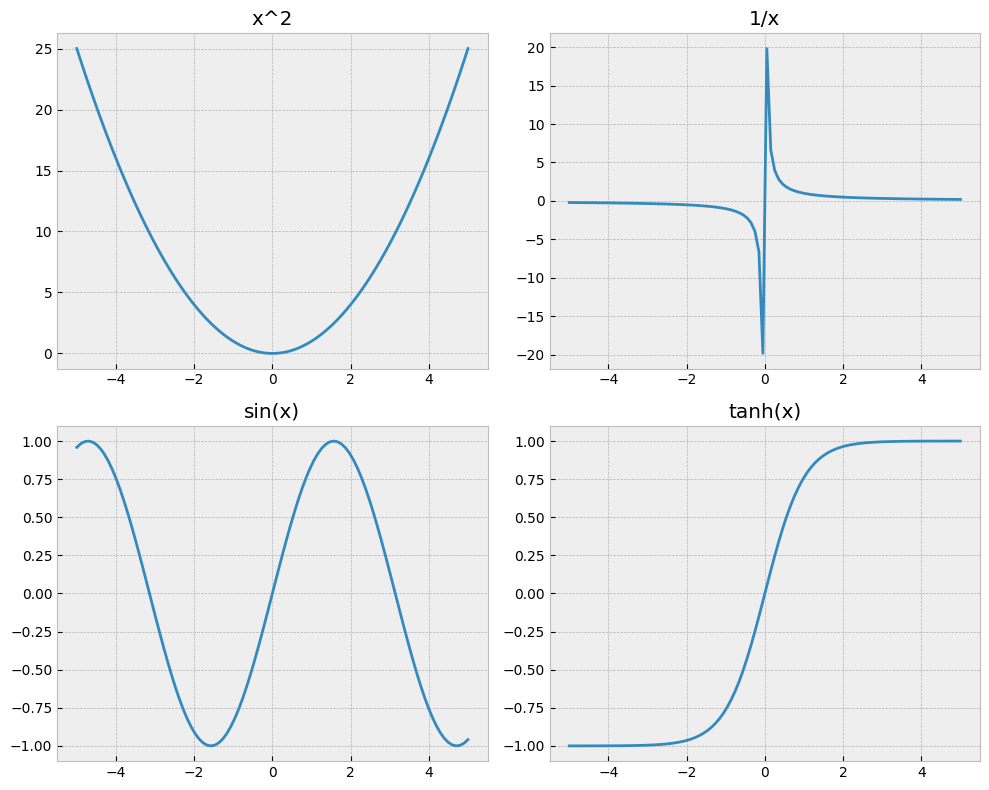

In [ ]:
# prompt: generate a 2x2 plot of functions x^2, 1/x. sin(x), and tanh(x)

import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def f1(x):
  return x**2

def f2(x):
  return 1/x

def f3(x):
  return np.sin(x)

def f4(x):
  return np.tanh(x)

# Create the x-values
x = np.linspace(-5, 5, 100)

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the functions
axes[0, 0].plot(x, f1(x))
axes[0, 0].set_title('x^2')

axes[0, 1].plot(x, f2(x))
axes[0, 1].set_title('1/x')

axes[1, 0].plot(x, f3(x))
axes[1, 0].set_title('sin(x)')

axes[1, 1].plot(x, f4(x))
axes[1, 1].set_title('tanh(x)')

# Adjust layout and display
plt.tight_layout()
plt.show()
